In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import tkinter as tk
from tkinter import ttk
from tkinter import *

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './formatted_stock_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create the GUI window
root = tk.Tk()
root.title("Stock Analysis")

# Create the Treeview widget
tree = ttk.Treeview(root)
tree["columns"] = ("Price", "25-day MA", "25-day MA Change")

# Define the column headings
tree.heading("#0", text="Symbol")
tree.heading("Price", text="Price")
tree.heading("25-day MA", text="25-day MA")
tree.heading("25-day MA Change", text="25-day MA Change")

# Threshold for filter
price_decline_threshold = -30  # You can adjust this threshold

# Create a list for filtered stocks based on conditions
filtered_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_price = historical_data.iloc[-1]["Close"]
        latest_25ma = historical_data.iloc[-1]["25MA"]
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Update the Treeview with the results for the current symbol
        tree.insert("", "end", text=ticker_symbol, values=(latest_price, latest_25ma, latest_25ma_change))

        # Check and add to the filtered list based on conditions
        if latest_25ma_change <= price_decline_threshold:
            filtered_list.append(ticker_symbol)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Print or use the filtered list as needed
print("Filtered List (Price declined 25-30% from 25-day MA):", filtered_list)

# Pack the Treeview into the GUI
tree.pack(expand=YES, fill=BOTH)

# Start the Tkinter main loop
root.mainloop()


Analyzing stock: AAVAS.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AFFLE.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock: BLS.NS
Analyzing stock: BSE.NS
Analyzing stock: BALAMINES.NS
Analyzing stock: BALRAMCHIN.NS
Analyzing stock: BIKAJI.NS
Analyzing stock: BIRLACORPN.NS
Analyzing stock: BSOFT.NS
Analyzing stock: CESC.NS
Analyzing stock: CIEINDIA.NS
Analyzing stock: CAMPUS.NS
Analyzing stock: CANFINHOME.NS
Analyzing stock: CEATLTD.NS
Analyzing stock: CENTRALBK.NS
Analyzing stock: CDSL.NS
Analyzing stock: CENTURYTEX.NS
Analyzing stock: CHAMBLFERT.NS
Analyzing stock: CUB.NS
Analyzing stock: COCHINSHIP.NS
Analyzing stock: CAMS.NS
Analyzing stock: CREDITACC.NS
Analyzing stock: CYIENT.NS
Analyzing stock: DATAPATTNS.NS
Analyzing stock: DEEPAKFERT.NS
Analyzing stock: EASEMYTRIP.NS
Analyzing stock: ELGIEQUIP.NS
Analyzing stock: EQUITASBNK.NS
Analyzing stock: EXIDEIND.NS
Analyzing s

In [12]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for positive and negative percentage change
positive_percentage_list = []
negative_percentage_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Check and add to the respective lists based on conditions
        if latest_25ma_change >= 0:
            positive_percentage_list.append((ticker_symbol, latest_25ma_change))
        else:
            negative_percentage_list.append((ticker_symbol, latest_25ma_change))

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create DataFrames for positive and negative percentage change
positive_df = pd.DataFrame(positive_percentage_list, columns=['Symbol', 'Percentage Change'])
negative_df = pd.DataFrame(negative_percentage_list, columns=['Symbol', 'Percentage Change'])

# Print the DataFrames
print("Stocks with Positive Percentage Change:")
print(positive_df)

print("\nStocks with Negative Percentage Change:")
print(negative_df)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

In [13]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for positive and negative percentage change
positive_percentage_list = []
negative_percentage_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Check and add to the respective lists based on conditions
        if latest_25ma_change >= 0:
            positive_percentage_list.append((ticker_symbol, latest_25ma_change))
        else:
            negative_percentage_list.append((ticker_symbol, latest_25ma_change))

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create DataFrames for positive and negative percentage change
positive_df = pd.DataFrame(positive_percentage_list, columns=['Symbol', 'Percentage Change'])
negative_df = pd.DataFrame(negative_percentage_list, columns=['Symbol', 'Percentage Change'])

# Save DataFrames to separate files
positive_file_path = 'positive_percentage_change.csv'
negative_file_path = 'negative_percentage_change.csv'

positive_df.to_csv(positive_file_path, index=False)
negative_df.to_csv(negative_file_path, index=False)

print(f"Stocks with Positive Percentage Change saved to: {positive_file_path}")
print(f"Stocks with Negative Percentage Change saved to: {negative_file_path}")


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

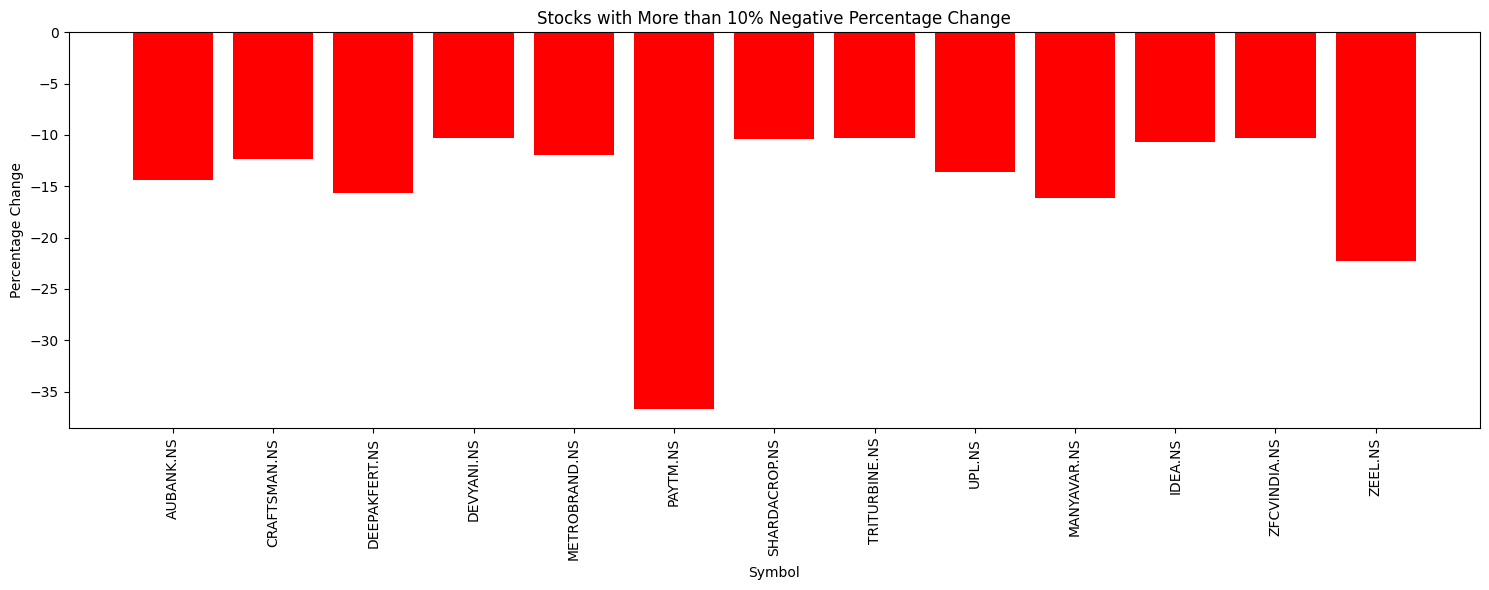

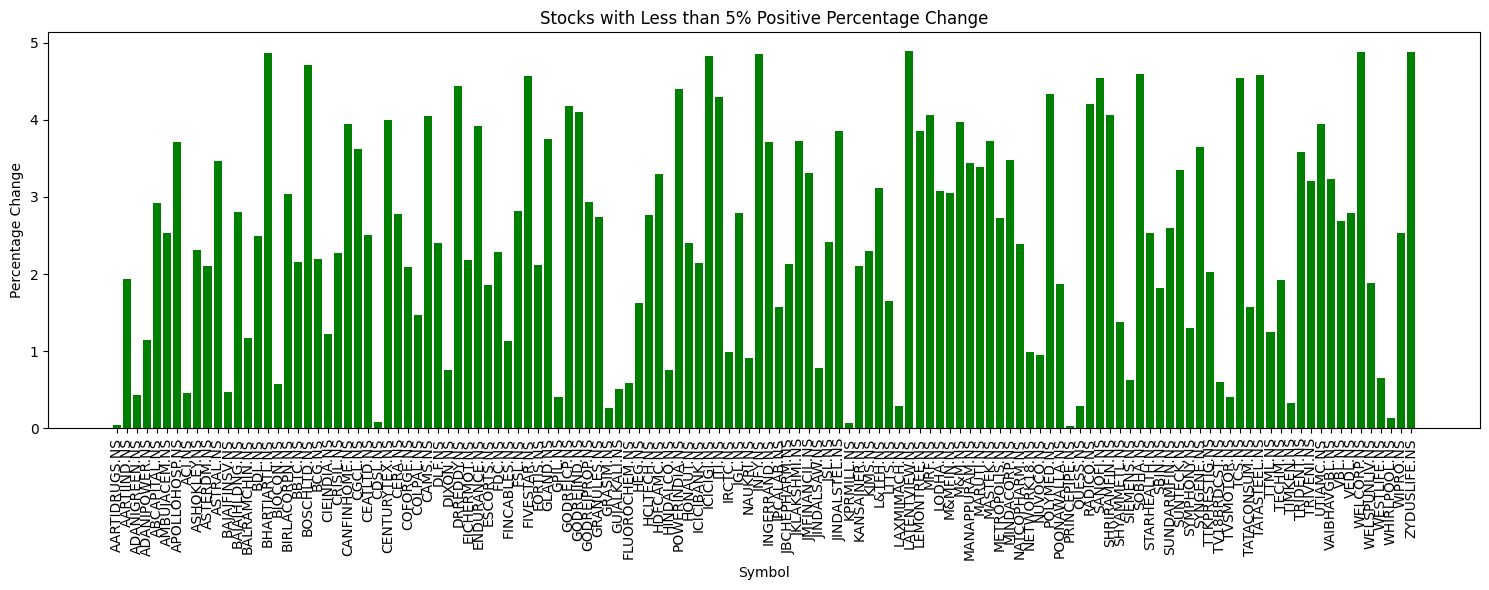

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
positive_df = pd.read_csv('positive_percentage_change.csv')
negative_df = pd.read_csv('negative_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < -10]

# Filter symbols with less than 5% positive percentage change
positive_5_percent_df = positive_df[positive_df['Percentage Change'] < 5]

# Plotting symbols with more than 10% negative percentage change
plt.figure(figsize=(15, 6))
plt.bar(negative_10_percent_df['Symbol'], negative_10_percent_df['Percentage Change'], color='red')
plt.title('Stocks with More than 10% Negative Percentage Change')
plt.xlabel('Symbol')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting symbols with less than 5% positive percentage change
plt.figure(figsize=(15, 6))
plt.bar(positive_5_percent_df['Symbol'], positive_5_percent_df['Percentage Change'], color='green')
plt.title('Stocks with Less than 5% Positive Percentage Change')
plt.xlabel('Symbol')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Read the CSV file
negative_df = pd.read_csv('negative_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < -10]

# Print the list with symbols and their percentage change
print("Symbols with more than 10% negative percentage change:")
for index, row in negative_10_percent_df.iterrows():
    print(f"{row['Symbol']}: {row['Percentage Change']}%")

Symbols with more than 10% negative percentage change:
AUBANK.NS: -14.39091146930771%
CRAFTSMAN.NS: -12.378637293431998%
DEEPAKFERT.NS: -15.662538580461668%
DEVYANI.NS: -10.266105641632626%
METROBRAND.NS: -11.94011428184451%
PAYTM.NS: -36.716167821937134%
SHARDACROP.NS: -10.387520844868837%
TRITURBINE.NS: -10.257834825420025%
UPL.NS: -13.56414443952138%
MANYAVAR.NS: -16.169149163801894%
IDEA.NS: -10.691171473458834%
ZFCVINDIA.NS: -10.281803291042118%
ZEEL.NS: -22.23070050231028%


In [28]:
import pandas as pd

# Read the CSV file
negative_df = pd.read_csv('positive_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < 2]

# Print the list with symbols and their percentage change
print("Symbols with more than 5% positive percentage change:")
for index, row in negative_10_percent_df.iterrows():
    print(f"{row['Symbol']}: {row['Percentage Change']}%")

Symbols with more than 5% positive percentage change:
AARTIDRUGS.NS: 0.0474987391036688%
AARTIIND.NS: 1.9394612226130925%
ADANIGREEN.NS: 0.4350779648172345%
ADANIPOWER.NS: 1.1485735457576969%
ACI.NS: 0.4538335400592848%
BAJAJFINSV.NS: 0.4670820829598534%
BALRAMCHIN.NS: 1.168113370543593%
BIOCON.NS: 0.5799763306974371%
CIEINDIA.NS: 1.2222678718159383%
CDSL.NS: 0.0840961725294102%
COLPAL.NS: 1.463650099461096%
DIXON.NS: 0.758341981430451%
ESCORTS.NS: 1.862210235301202%
FINCABLES.NS: 1.1332625340059268%
GPIL.NS: 0.4104735228657815%
GRASIM.NS: 0.2670615355397815%
GUJALKALI.NS: 0.5045996170081032%
FLUOROCHEM.NS: 0.5863038744096369%
HEG.NS: 1.6242249026804465%
HINDALCO.NS: 0.750373250592502%
IRCTC.NS: 0.9854701175431598%
NAUKRI.NS: 0.9082298363637122%
IPCALAB.NS: 1.571008351197824%
JINDALSAW.NS: 0.7843992059720358%
KPRMILL.NS: 0.0691547974739578%
LTTS.NS: 1.6514392339126815%
LAXMIMACH.NS: 0.2833204691314769%
NETWORK18.NS: 0.9891013999636564%
NUVOCO.NS: 0.9499515970764943%
POONAWALLA.NS: 1.87

## 25 - 44 and 200 MA Scanner

In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for strategy signals
cross_above_25_44_list = []  # Stocks where 25-day MA crosses above 44-day MA
cross_above_44_200_list = []  # Stocks where 44-day MA crosses above 200-day MA

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Define base slow and fast moving averages
        fast_ma = 25
        slow_ma_1 = 44
        slow_ma_2 = 200

        # Calculate the moving averages for the strategy
        historical_data['fast_ma'] = historical_data['Close'].rolling(window=fast_ma).mean()
        historical_data['slow_ma_1'] = historical_data['Close'].rolling(window=slow_ma_1).mean()
        historical_data['slow_ma_2'] = historical_data['Close'].rolling(window=slow_ma_2).mean()

        # Create a column with buy and sell signals
        historical_data['signal_25_44'] = np.where(
            (historical_data['fast_ma'] > historical_data['slow_ma_1']) 
            & (historical_data['fast_ma'].shift(1) <= historical_data['slow_ma_1'].shift(1)),
            1.0,
            0.0
        )

        historical_data['signal_44_200'] = np.where(
            (historical_data['slow_ma_1'] > historical_data['slow_ma_2'])
            & (historical_data['slow_ma_1'].shift(1) <= historical_data['slow_ma_2'].shift(1)),
            1.0,
            0.0
        )

        # Append symbols to lists based on signals
        if historical_data['signal_25_44'].iloc[-1] == 1:
            cross_above_25_44_list.append(ticker_symbol)

        if historical_data['signal_44_200'].iloc[-1] == 1:
            cross_above_44_200_list.append(ticker_symbol)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Print or use the created lists as needed
print("Stocks where 25-day MA crosses above 44-day MA:", cross_above_25_44_list)
print("Stocks where 44-day MA crosses above 200-day MA:", cross_above_44_200_list)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

In [6]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'EMA {ema1}', f'EMA {ema2}'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if historical_data[f'EMA {ema1}'].iloc[-1] > historical_data[f'EMA {ema2}'].iloc[-1]:
                    results_df = results_df.append({
                        'Stock Symbol': ticker_symbol,
                        'Close Price': historical_data['Close'].iloc[-1],
                        f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                        f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                    }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './final_small500.txt'
    output_file = 'crossover_results.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/501: 360ONE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 2/501: 3MINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 3/501: ABB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 4/501: ACC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 5/501: AIAENG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 6/501: APLAPOLLO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 7/501: AUBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 8/501: AARTIDRUGS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 9/501: AARTIIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 10/501: AAVAS.NS
Analyzing stock 11/501: ABBOTINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 12/501: ADANIENSOL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 13/501: ADANIENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 14/501: ADANIGREEN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 15/501: ADANIPORTS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 16/501: ADANIPOWER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 17/501: ATGL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 18/501: AWL.NS
Analyzing stock 19/501: ABCAPITAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 20/501: ABFRL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 21/501: AEGISCHEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 22/501: AETHER.NS
Analyzing stock 23/501: AFFLE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 24/501: AJANTPHARM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 25/501: APLLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 26/501: ALKEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 27/501: ALKYLAMINE.NS
Analyzing stock 28/501: ALLCARGO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 29/501: ALOKINDS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 30/501: ARE&M.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 31/501: AMBER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 32/501: AMBUJACEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 33/501: ANGELONE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 34/501: ANURAS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 35/501: APARINDS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 36/501: APOLLOHOSP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 37/501: APOLLOTYRE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 38/501: APTUS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 39/501: ACI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 40/501: ASAHIINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 41/501: ASHOKLEY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 42/501: ASIANPAINT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 43/501: ASTERDM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 44/501: ASTRAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 45/501: ATUL.NS
Analyzing stock 46/501: AUROPHARMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 47/501: AVANTIFEED.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 48/501: DMART.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 49/501: AXISBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 50/501: BEML.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 51/501: BLS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 52/501: BSE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 53/501: BAJAJ-AUTO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 54/501: BAJFINANCE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 55/501: BAJAJFINSV.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 56/501: BAJAJHLDNG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 57/501: BALAMINES.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 58/501: BALKRISIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 59/501: BALRAMCHIN.NS
Analyzing stock 60/501: BANDHANBNK.NS
Analyzing stock 61/501: BANKBARODA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 62/501: BANKINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 63/501: MAHABANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 64/501: BATAINDIA.NS
Analyzing stock 65/501: BAYERCROP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 66/501: BERGEPAINT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 67/501: BDL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 68/501: BEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 69/501: BHARATFORG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 70/501: BHEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 71/501: BPCL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 72/501: BHARTIARTL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 73/501: BIKAJI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 74/501: BIOCON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 75/501: BIRLACORPN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 76/501: BSOFT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 77/501: BLUEDART.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 78/501: BLUESTARCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 79/501: BBTC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 80/501: BORORENEW.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 81/501: BOSCHLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 82/501: BRIGADE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 83/501: BCG.NS
Analyzing stock 84/501: BRITANNIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 85/501: MAPMYINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 86/501: CCL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 87/501: CESC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 88/501: CGPOWER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 89/501: CIEINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 90/501: CRISIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 91/501: CSBBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 92/501: CAMPUS.NS
Analyzing stock 93/501: CANFINHOME.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 94/501: CANBK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 95/501: CGCL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 96/501: CARBORUNIV.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 97/501: CASTROLIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 98/501: CEATLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 99/501: CENTRALBK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 100/501: CDSL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 101/501: CENTURYPLY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 102/501: CENTURYTEX.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 103/501: CERA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 104/501: CHALET.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 105/501: CHAMBLFERT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 106/501: CHEMPLASTS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 107/501: CHOLAHLDNG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 108/501: CHOLAFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 109/501: CIPLA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 110/501: CUB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 111/501: CLEAN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 112/501: COALINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 113/501: COCHINSHIP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 114/501: COFORGE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 115/501: COLPAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 116/501: CAMS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 117/501: CONCORDBIO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 118/501: CONCOR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 119/501: COROMANDEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 120/501: CRAFTSMAN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 121/501: CREDITACC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 122/501: CROMPTON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 123/501: CUMMINSIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 124/501: CYIENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 125/501: DCMSHRIRAM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 126/501: DLF.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 127/501: DABUR.NS
Analyzing stock 128/501: DALBHARAT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 129/501: DATAPATTNS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 130/501: DEEPAKFERT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 131/501: DEEPAKNTR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 132/501: DELHIVERY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 133/501: DELTACORP.NS
Analyzing stock 134/501: DEVYANI.NS
Analyzing stock 135/501: DIVISLAB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 136/501: DIXON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 137/501: LALPATHLAB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 138/501: DRREDDY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 139/501: EIDPARRY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 140/501: EIHOTEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 141/501: EPL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 142/501: EASEMYTRIP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 143/501: EICHERMOT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 144/501: ELGIEQUIP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 145/501: EMAMILTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 146/501: ENDURANCE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 147/501: ENGINERSIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 148/501: EPIGRAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 149/501: EQUITASBNK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 150/501: ERIS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 151/501: ESCORTS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 152/501: EXIDEIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 153/501: FDC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 154/501: NYKAA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 155/501: FEDERALBNK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 156/501: FACT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 157/501: FINEORG.NS
Analyzing stock 158/501: FINCABLES.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 159/501: FINPIPE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 160/501: FSL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 161/501: FIVESTAR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 162/501: FORTIS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 163/501: GRINFRA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 164/501: GAIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 165/501: GMMPFAUDLR.NS
Analyzing stock 166/501: GMRINFRA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 167/501: GALAXYSURF.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 168/501: GICRE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 169/501: GILLETTE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 170/501: GLAND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 171/501: GLAXO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 172/501: GLS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 173/501: GLENMARK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 174/501: MEDANTA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 175/501: GOCOLORS.NS
Analyzing stock 176/501: GPIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 177/501: GODFRYPHLP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 178/501: GODREJCP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 179/501: GODREJIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 180/501: GODREJPROP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 181/501: GRANULES.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 182/501: GRAPHITE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 183/501: GRASIM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 184/501: GESHIP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 185/501: GRINDWELL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 186/501: GUJALKALI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 187/501: GAEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 188/501: FLUOROCHEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 189/501: GUJGASLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 190/501: GNFC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 191/501: GPPL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 192/501: GSFC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 193/501: GSPL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 194/501: HEG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 195/501: HCLTECH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 196/501: HDFCAMC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 197/501: HDFCBANK.NS
Analyzing stock 198/501: HDFCLIFE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 199/501: HFCL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 200/501: HLEGLAS.NS
Analyzing stock 201/501: HAPPSTMNDS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 202/501: HAVELLS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 203/501: HEROMOTOCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 204/501: HINDALCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 205/501: HAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 206/501: HINDCOPPER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 207/501: HINDPETRO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 208/501: HINDUNILVR.NS
Analyzing stock 209/501: HINDZINC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 210/501: POWERINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 211/501: HOMEFIRST.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 212/501: HONAUT.NS
Analyzing stock 213/501: HUDCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 214/501: ICICIBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 215/501: ICICIGI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 216/501: ICICIPRULI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 217/501: ISEC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 218/501: IDBI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 219/501: IDFCFIRSTB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 220/501: IDFC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 221/501: IIFL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 222/501: IRB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 223/501: IRCON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 224/501: ITC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 225/501: ITI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 226/501: INDIACEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 227/501: IBULHSGFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 228/501: INDIAMART.NS
Analyzing stock 229/501: INDIANB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 230/501: IEX.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 231/501: INDHOTEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 232/501: IOC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 233/501: IOB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 234/501: IRCTC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 235/501: IRFC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 236/501: INDIGOPNTS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 237/501: IGL.NS
Analyzing stock 238/501: INDUSTOWER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 239/501: INDUSINDBK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 240/501: INFIBEAM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 241/501: NAUKRI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 242/501: INFY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 243/501: INGERRAND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 244/501: INTELLECT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 245/501: INDIGO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 246/501: IPCALAB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 247/501: JBCHEPHARM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 248/501: JKCEMENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 249/501: JBMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 250/501: JKLAKSHMI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 251/501: JKPAPER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 252/501: JMFINANCIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 253/501: JSWENERGY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 254/501: JSWSTEEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 255/501: JAMNAAUTO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 256/501: JINDALSAW.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 257/501: JSL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 258/501: JINDALSTEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 259/501: JUBLFOOD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 260/501: JUBLINGREA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 261/501: JUBLPHARMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 262/501: JUSTDIAL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 263/501: JYOTHYLAB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 264/501: KPRMILL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 265/501: KEI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 266/501: KNRCON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 267/501: KPITTECH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 268/501: KRBL.NS
Analyzing stock 269/501: KSB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 270/501: KAJARIACER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 271/501: KPIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 272/501: KALYANKJIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 273/501: KANSAINER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 274/501: KARURVYSYA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 275/501: KAYNES.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 276/501: KEC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 277/501: KFINTECH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 278/501: KOTAKBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 279/501: KIMS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 280/501: L&TFH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 281/501: LTTS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 282/501: LICHSGFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 283/501: LTIM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 284/501: LAXMIMACH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 285/501: LT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 286/501: LATENTVIEW.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 287/501: LAURUSLABS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 288/501: LXCHEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 289/501: LEMONTREE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 290/501: LICI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 291/501: LINDEINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 292/501: LUPIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 293/501: LUXIND.NS
Analyzing stock 294/501: MMTC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 295/501: MRF.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 296/501: MTARTECH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 297/501: LODHA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 298/501: MGL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 299/501: M&MFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 300/501: M&M.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 301/501: MHRIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 302/501: MAHLIFE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 303/501: MANAPPURAM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 304/501: MRPL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 305/501: MANKIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 306/501: MARICO.NS
Analyzing stock 307/501: MARUTI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 308/501: MASTEK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 309/501: MFSL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 310/501: MAXHEALTH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 311/501: MAZDOCK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 312/501: MEDPLUS.NS
Analyzing stock 313/501: METROBRAND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 314/501: METROPOLIS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 315/501: MINDACORP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 316/501: MSUMI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 317/501: MOTILALOFS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 318/501: MPHASIS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 319/501: MCX.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 320/501: MUTHOOTFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 321/501: NATCOPHARM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 322/501: NBCC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 323/501: NCC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 324/501: NHPC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 325/501: NLCINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 326/501: NMDC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 327/501: NSLNISP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 328/501: NTPC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 329/501: NH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 330/501: NATIONALUM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 331/501: NAVINFLUOR.NS
Analyzing stock 332/501: NAZARA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 333/501: NESTLEIND.NS
Analyzing stock 334/501: NETWORK18.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 335/501: NAM-INDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 336/501: NUVOCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 337/501: OBEROIRLTY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 338/501: ONGC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 339/501: OIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 340/501: OLECTRA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 341/501: PAYTM.NS
Analyzing stock 342/501: OFSS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 343/501: ORIENTELEC.NS
Analyzing stock 344/501: POLICYBZR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 345/501: PCBL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 346/501: PIIND.NS
Analyzing stock 347/501: PNBHOUSING.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 348/501: PNCINFRA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 349/501: PVRINOX.NS
Analyzing stock 350/501: PAGEIND.NS
Analyzing stock 351/501: PATANJALI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 352/501: PERSISTENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 353/501: PETRONET.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 354/501: PFIZER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 355/501: PHOENIXLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 356/501: PIDILITIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 357/501: PEL.NS
Analyzing stock 358/501: PPLPHARMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 359/501: POLYMED.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 360/501: POLYCAB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 361/501: POLYPLEX.NS
Analyzing stock 362/501: POONAWALLA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 363/501: PFC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 364/501: POWERGRID.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 365/501: PRAJIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 366/501: PRESTIGE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 367/501: PRINCEPIPE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 368/501: PRSMJOHNSN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 369/501: PGHL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 370/501: PGHH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 371/501: PNB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 372/501: QUESS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 373/501: RBLBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 374/501: RECLTD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 375/501: RHIM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 376/501: RITES.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 377/501: RADICO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 378/501: RVNL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 379/501: RAIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 380/501: RAINBOW.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 381/501: RAJESHEXPO.NS
Analyzing stock 382/501: RALLIS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 383/501: RCF.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 384/501: RATNAMANI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 385/501: RTNINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 386/501: RAYMOND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 387/501: REDINGTON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 388/501: RELAXO.NS
Analyzing stock 389/501: RELIANCE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 390/501: RBA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 391/501: ROSSARI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 392/501: ROUTE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 393/501: SBICARD.NS
Analyzing stock 394/501: SBILIFE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 395/501: SJVN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 396/501: SKFINDIA.NS
Analyzing stock 397/501: SRF.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 398/501: SAFARI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 399/501: MOTHERSON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 400/501: SANOFI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 401/501: SAPPHIRE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 402/501: SAREGAMA.NS
Analyzing stock 403/501: SCHAEFFLER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 404/501: SHARDACROP.NS
Analyzing stock 405/501: SFL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 406/501: SHOPERSTOP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 407/501: SHREECEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 408/501: RENUKA.NS
Analyzing stock 409/501: SHRIRAMFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 410/501: SHYAMMETL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 411/501: SIEMENS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 412/501: SOBHA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 413/501: SOLARINDS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 414/501: SONACOMS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 415/501: SONATSOFTW.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 416/501: STARHEALTH.NS
Analyzing stock 417/501: SBIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 418/501: SAIL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 419/501: SWSOLAR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 420/501: STLTECH.NS
Analyzing stock 421/501: SUMICHEM.NS
Analyzing stock 422/501: SPARC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 423/501: SUNPHARMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 424/501: SUNTV.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 425/501: SUNDARMFIN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 426/501: SUNDRMFAST.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 427/501: SUNTECK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 428/501: SUPRAJIT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 429/501: SUPREMEIND.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 430/501: SUVENPHAR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 431/501: SUZLON.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 432/501: SWANENERGY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 433/501: SYMPHONY.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 434/501: SYNGENE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 435/501: SYRMA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 436/501: TTKPRESTIG.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 437/501: TV18BRDCST.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 438/501: TVSMOTOR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 439/501: TANLA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 440/501: TATACHEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 441/501: TATACOMM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 442/501: TCS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 443/501: TATACONSUM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 444/501: TATAELXSI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 445/501: TATAINVEST.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 446/501: TATAMTRDVR.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 447/501: TATAMOTORS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 448/501: TATAPOWER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 449/501: TATASTEEL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 450/501: TTML.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 451/501: TEAMLEASE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 452/501: TECHM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 453/501: TEJASNET.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 454/501: NIACL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 455/501: RAMCOCEM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 456/501: THERMAX.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 457/501: TIMKEN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 458/501: TITAN.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 459/501: TORNTPHARM.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 460/501: TORNTPOWER.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 461/501: TRENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 462/501: TRIDENT.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 463/501: TRIVENI.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 464/501: TRITURBINE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 465/501: TIINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 466/501: UCOBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 467/501: UNOMINDA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 468/501: UPL.NS
Analyzing stock 469/501: UTIAMC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 470/501: UJJIVANSFB.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 471/501: ULTRACEMCO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 472/501: UNIONBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 473/501: UBL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 474/501: MCDOWELL-N.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 475/501: USHAMART.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 476/501: VGUARD.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 477/501: VMART.NS
Analyzing stock 478/501: VIPIND.NS
Analyzing stock 479/501: VAIBHAVGBL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 480/501: VTL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 481/501: VARROC.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 482/501: VBL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 483/501: MANYAVAR.NS
Analyzing stock 484/501: VEDL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 485/501: VIJAYA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 486/501: VINATIORGA.NS
Analyzing stock 487/501: IDEA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 488/501: VOLTAS.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 489/501: WELCORP.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 490/501: WELSPUNLIV.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 491/501: WESTLIFE.NS
Analyzing stock 492/501: WHIRLPOOL.NS
Analyzing stock 493/501: WIPRO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 494/501: YESBANK.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 495/501: ZFCVINDIA.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 496/501: ZEEL.NS
Analyzing stock 497/501: ZENSARTECH.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 498/501: ZOMATO.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 499/501: ZYDUSLIFE.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 500/501: ZYDUSWELL.NS


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 501/501: ECLERX.NS

Results:
      Stock Symbol   Close Price        EMA 44       EMA 200
0        360ONE.NS    629.599976    626.879693    544.309619
1       3MINDIA.NS  33128.500000  33232.637806  29872.614870
2           ABB.NS   4411.700195   4641.492456   4239.031655
3           ACC.NS   2509.199951   2280.887432   2037.881261
4        AIAENG.NS   4401.549805   3814.392656   3467.730271
..             ...           ...           ...           ...
443  ZENSARTECH.NS    597.150024    563.745057    479.787366
444      ZOMATO.NS    140.449997    130.593043    102.711936
445   ZYDUSLIFE.NS    797.200012    707.147085    619.063700
446   ZYDUSWELL.NS   1607.800049   1606.878537   1554.708047
447      ECLERX.NS   2652.899902   2577.766479   2091.170889

[448 rows x 4 columns]

Analysis completed. Results saved in crossover_results.csv


/tmp/ipykernel_6123/3428397283.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [7]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'SMA {sma1}', f'SMA {sma2}', f'SMA {sma3}', f'EMA {ema1}', f'EMA {ema2}'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'SMA {sma1}'] = historical_data['Close'].rolling(window=sma1).mean()
                historical_data[f'SMA {sma2}'] = historical_data['Close'].rolling(window=sma2).mean()
                historical_data[f'SMA {sma3}'] = historical_data['Close'].rolling(window=sma3).mean()
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma3}'].iloc[-1]) and \
                   (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma1}'].iloc[-1]):
                    # Calculate the percentage change for the crossover
                    crossover_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data[f'SMA {sma3}'].iloc[-1]) /
                                           historical_data[f'SMA {sma3}'].iloc[-1]) * 100

                    # Filter stocks with crossover by 1% or 2%
                    if crossover_percentage >= 1.0:
                        results_df = results_df.append({
                            'Stock Symbol': ticker_symbol,
                            'Close Price': historical_data['Close'].iloc[-1],
                            f'SMA {sma1}': historical_data[f'SMA {sma1}'].iloc[-1],
                            f'SMA {sma2}': historical_data[f'SMA {sma2}'].iloc[-1],
                            f'SMA {sma3}': historical_data[f'SMA {sma3}'].iloc[-1],
                            f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                            f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                        }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './nifty50_symbols.txt'
    output_file = 'crossover_results.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/47: ADANIPORTS.NS
Analyzing stock 2/47: ASIANPAINT.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 3/47: AXISBANK.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 4/47: BAJAJ-AUTO.NS
Analyzing stock 5/47: BAJFINANCE.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 6/47: BAJAJFINSV.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 7/47: BHARTIARTL.NS
Analyzing stock 8/47: BRITANNIA.NS
Analyzing stock 9/47: CIPLA.NS
Analyzing stock 10/47: COALINDIA.NS
Analyzing stock 11/47: DIVISLAB.NS
Analyzing stock 12/47: DRREDDY.NS
Analyzing stock 13/47: EICHERMOT.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 14/47: GRASIM.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 15/47: HCLTECH.NS
Analyzing stock 16/47: HDFCBANK.NS
Analyzing stock 17/47: HEROMOTOCO.NS
Analyzing stock 18/47: HINDALCO.NS
Analyzing stock 19/47: HINDUNILVR.NS
Analyzing stock 20/47: ICICIBANK.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 21/47: IOC.NS
Analyzing stock 22/47: INDUSINDBK.NS
Analyzing stock 23/47: INFY.NS
Analyzing stock 24/47: ITC.NS
Analyzing stock 25/47: JSWSTEEL.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 26/47: KOTAKBANK.NS
Analyzing stock 27/47: LT.NS
Analyzing stock 28/47: M&M.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 29/47: MARUTI.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 30/47: NESTLEIND.NS
Analyzing stock 31/47: NTPC.NS
Analyzing stock 32/47: ONGC.NS
Analyzing stock 33/47: POWERGRID.NS
Analyzing stock 34/47: RELIANCE.NS
Analyzing stock 35/47: SHREECEM.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 36/47: SBIN.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 37/47: SBILIFE.NS


/tmp/ipykernel_6123/3485716284.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 38/47: SUNPHARMA.NS
Analyzing stock 39/47: TCS.NS
Analyzing stock 40/47: TATACONSUM.NS
Analyzing stock 41/47: TATAMOTORS.NS
Analyzing stock 42/47: TATASTEEL.NS
Analyzing stock 43/47: TECHM.NS
Analyzing stock 44/47: TITAN.NS
Analyzing stock 45/47: ULTRACEMCO.NS
Analyzing stock 46/47: UBL.NS
Analyzing stock 47/47: WIPRO.NS

Results:
     Stock Symbol   Close Price        SMA 25        SMA 44       SMA 200  \
0   ASIANPAINT.NS   2917.350098   3171.932031   3225.205700   3190.187437   
1     AXISBANK.NS   1056.750000   1093.546006   1101.768180    997.654836   
2   BAJFINANCE.NS   6627.299805   7272.477949   7313.622681   7231.460945   
3   BAJAJFINSV.NS   1591.650024   1637.596001   1661.764776   1556.836635   
4    EICHERMOT.NS   3926.949951   3799.912012   3907.254539   3552.817672   
5       GRASIM.NS   2086.149902   2088.666875   2090.687433   1882.173101   
6    ICICIBANK.NS   1031.150024   1003.418008   1006.164780    957.608456   
7     JSWSTEEL.NS    809.299988    

In [8]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'SMA {sma1}', f'SMA {sma2}', f'SMA {sma3}', 
                                           f'EMA {ema1}', f'EMA {ema2}', 'SMA Crossover Percentage', 'EMA Crossover Percentage'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'SMA {sma1}'] = historical_data['Close'].rolling(window=sma1).mean()
                historical_data[f'SMA {sma2}'] = historical_data['Close'].rolling(window=sma2).mean()
                historical_data[f'SMA {sma3}'] = historical_data['Close'].rolling(window=sma3).mean()
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma3}'].iloc[-1]) and \
                   (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma1}'].iloc[-1]):
                    # Calculate the percentage difference for SMA crossover
                    sma_crossover_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data[f'SMA {sma3}'].iloc[-1]) /
                                                historical_data[f'SMA {sma3}'].iloc[-1]) * 100

                    # Filter stocks with crossover by 1% or 2%
                    if abs(sma_crossover_percentage) >= 1.0:
                        # Calculate the percentage difference for EMA crossover
                        ema_crossover_percentage = ((historical_data[f'EMA {ema1}'].iloc[-1] - historical_data[f'EMA {ema2}'].iloc[-1]) /
                                                    historical_data[f'EMA {ema2}'].iloc[-1]) * 100

                        # Determine if the close price is below or above the crossover
                        close_vs_sma = 'Negative' if historical_data['Close'].iloc[-1] < historical_data[f'SMA {sma2}'].iloc[-1] else 'Positive'

                        results_df = results_df.append({
                            'Stock Symbol': ticker_symbol,
                            'Close Price': historical_data['Close'].iloc[-1],
                            f'SMA {sma1}': historical_data[f'SMA {sma1}'].iloc[-1],
                            f'SMA {sma2}': historical_data[f'SMA {sma2}'].iloc[-1],
                            f'SMA {sma3}': historical_data[f'SMA {sma3}'].iloc[-1],
                            f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                            f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                            'SMA Crossover Percentage': sma_crossover_percentage,
                            'EMA Crossover Percentage': ema_crossover_percentage,
                            'Close vs SMA': close_vs_sma
                        }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './niftysmallcap500.txt'
    output_file = 'crossover_results.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/47: ADANIPORTS.NS
Analyzing stock 2/47: ASIANPAINT.NS
Analyzing stock 3/47: AXISBANK.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 4/47: BAJAJ-AUTO.NS
Analyzing stock 5/47: BAJFINANCE.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 6/47: BAJAJFINSV.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 7/47: BHARTIARTL.NS
Analyzing stock 8/47: BRITANNIA.NS
Analyzing stock 9/47: CIPLA.NS
Analyzing stock 10/47: COALINDIA.NS
Analyzing stock 11/47: DIVISLAB.NS
Analyzing stock 12/47: DRREDDY.NS
Analyzing stock 13/47: EICHERMOT.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 14/47: GRASIM.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 15/47: HCLTECH.NS
Analyzing stock 16/47: HDFCBANK.NS
Analyzing stock 17/47: HEROMOTOCO.NS
Analyzing stock 18/47: HINDALCO.NS
Analyzing stock 19/47: HINDUNILVR.NS
Analyzing stock 20/47: ICICIBANK.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 21/47: IOC.NS
Analyzing stock 22/47: INDUSINDBK.NS
Analyzing stock 23/47: INFY.NS
Analyzing stock 24/47: ITC.NS
Analyzing stock 25/47: JSWSTEEL.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 26/47: KOTAKBANK.NS
Analyzing stock 27/47: LT.NS
Analyzing stock 28/47: M&M.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 29/47: MARUTI.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 30/47: NESTLEIND.NS
Analyzing stock 31/47: NTPC.NS
Analyzing stock 32/47: ONGC.NS
Analyzing stock 33/47: POWERGRID.NS
Analyzing stock 34/47: RELIANCE.NS
Analyzing stock 35/47: SHREECEM.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 36/47: SBIN.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 37/47: SBILIFE.NS


/tmp/ipykernel_6123/2841354632.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 38/47: SUNPHARMA.NS
Analyzing stock 39/47: TCS.NS
Analyzing stock 40/47: TATACONSUM.NS
Analyzing stock 41/47: TATAMOTORS.NS
Analyzing stock 42/47: TATASTEEL.NS
Analyzing stock 43/47: TECHM.NS
Analyzing stock 44/47: TITAN.NS
Analyzing stock 45/47: ULTRACEMCO.NS
Analyzing stock 46/47: UBL.NS
Analyzing stock 47/47: WIPRO.NS

Results:
     Stock Symbol   Close Price        SMA 25        SMA 44       SMA 200  \
0     AXISBANK.NS   1055.250000   1093.486006   1101.734089    997.647336   
1   BAJFINANCE.NS   6636.700195   7272.853965   7313.836326   7231.507947   
2   BAJAJFINSV.NS   1590.300049   1637.542002   1661.734095   1556.829885   
3    EICHERMOT.NS   3933.500000   3800.174014   3907.403404   3552.850422   
4       GRASIM.NS   2086.899902   2088.696875   2090.704479   1882.176851   
5    ICICIBANK.NS   1030.150024   1003.378008   1006.142052    957.603456   
6     JSWSTEEL.NS    810.250000    820.528010    834.157962    780.759555   
7          M&M.NS   1721.900024   1

In [9]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'SMA {sma1}', f'SMA {sma2}', f'SMA {sma3}', 
                                           f'EMA {ema1}', f'EMA {ema2}', 'SMA Crossover Percentage', 'EMA Crossover Percentage', 'Close vs SMA'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'SMA {sma1}'] = historical_data['Close'].rolling(window=sma1).mean()
                historical_data[f'SMA {sma2}'] = historical_data['Close'].rolling(window=sma2).mean()
                historical_data[f'SMA {sma3}'] = historical_data['Close'].rolling(window=sma3).mean()
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma3}'].iloc[-1]) and \
                   (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma1}'].iloc[-1]):
                    # Calculate the percentage difference for SMA crossover
                    sma_crossover_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data[f'SMA {sma3}'].iloc[-1]) /
                                                historical_data[f'SMA {sma3}'].iloc[-1]) * 100

                    # Filter stocks with crossover by 1% or 2%
                    if abs(sma_crossover_percentage) >= 1.0:
                        # Calculate the percentage difference for EMA crossover
                        ema_crossover_percentage = ((historical_data[f'EMA {ema1}'].iloc[-1] - historical_data[f'EMA {ema2}'].iloc[-1]) /
                                                    historical_data[f'EMA {ema2}'].iloc[-1]) * 100

                        # Determine if the close price is below or above the crossover
                        close_vs_sma = 'Negative' if historical_data['Close'].iloc[-1] < historical_data[f'SMA {sma2}'].iloc[-1] else 'Positive'

                        results_df = results_df.append({
                            'Stock Symbol': ticker_symbol,
                            'Close Price': historical_data['Close'].iloc[-1],
                            f'SMA {sma1}': historical_data[f'SMA {sma1}'].iloc[-1],
                            f'SMA {sma2}': historical_data[f'SMA {sma2}'].iloc[-1],
                            f'SMA {sma3}': historical_data[f'SMA {sma3}'].iloc[-1],
                            f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                            f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                            'SMA Crossover Percentage': f"{'' if sma_crossover_percentage >= 0 else '-'}{abs(sma_crossover_percentage)}%",
                            'EMA Crossover Percentage': f"{'' if ema_crossover_percentage >= 0 else '-'}{abs(ema_crossover_percentage)}%",
                            'Close vs SMA': close_vs_sma
                        }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './final_small500.txt'
    output_file = 'crossover_results.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/501: 360ONE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 2/501: 3MINDIA.NS
Analyzing stock 3/501: ABB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 4/501: ACC.NS
Analyzing stock 5/501: AIAENG.NS
Analyzing stock 6/501: APLAPOLLO.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 7/501: AUBANK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 8/501: AARTIDRUGS.NS
Analyzing stock 9/501: AARTIIND.NS
Analyzing stock 10/501: AAVAS.NS
Analyzing stock 11/501: ABBOTINDIA.NS
Analyzing stock 12/501: ADANIENSOL.NS
Analyzing stock 13/501: ADANIENT.NS
Analyzing stock 14/501: ADANIGREEN.NS
Analyzing stock 15/501: ADANIPORTS.NS
Analyzing stock 16/501: ADANIPOWER.NS
Analyzing stock 17/501: ATGL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 18/501: AWL.NS
Analyzing stock 19/501: ABCAPITAL.NS
Analyzing stock 20/501: ABFRL.NS
Analyzing stock 21/501: AEGISCHEM.NS
Analyzing stock 22/501: AETHER.NS
Analyzing stock 23/501: AFFLE.NS
Analyzing stock 24/501: AJANTPHARM.NS
Analyzing stock 25/501: APLLTD.NS
Analyzing stock 26/501: ALKEM.NS
Analyzing stock 27/501: ALKYLAMINE.NS
Analyzing stock 28/501: ALLCARGO.NS
Analyzing stock 29/501: ALOKINDS.NS
Analyzing stock 30/501: ARE&M.NS
Analyzing stock 31/501: AMBER.NS
Analyzing stock 32/501: AMBUJACEM.NS
Analyzing stock 33/501: ANGELONE.NS
Analyzing stock 34/501: ANURAS.NS
Analyzing stock 35/501: APARINDS.NS
Analyzing stock 36/501: APOLLOHOSP.NS
Analyzing stock 37/501: APOLLOTYRE.NS
Analyzing stock 38/501: APTUS.NS
Analyzing stock 39/501: ACI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 40/501: ASAHIINDIA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 41/501: ASHOKLEY.NS
Analyzing stock 42/501: ASIANPAINT.NS
Analyzing stock 43/501: ASTERDM.NS
Analyzing stock 44/501: ASTRAL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 45/501: ATUL.NS
Analyzing stock 46/501: AUROPHARMA.NS
Analyzing stock 47/501: AVANTIFEED.NS
Analyzing stock 48/501: DMART.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 49/501: AXISBANK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 50/501: BEML.NS
Analyzing stock 51/501: BLS.NS
Analyzing stock 52/501: BSE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 53/501: BAJAJ-AUTO.NS
Analyzing stock 54/501: BAJFINANCE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 55/501: BAJAJFINSV.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 56/501: BAJAJHLDNG.NS
Analyzing stock 57/501: BALAMINES.NS
Analyzing stock 58/501: BALKRISIND.NS
Analyzing stock 59/501: BALRAMCHIN.NS
Analyzing stock 60/501: BANDHANBNK.NS
Analyzing stock 61/501: BANKBARODA.NS
Analyzing stock 62/501: BANKINDIA.NS
Analyzing stock 63/501: MAHABANK.NS
Analyzing stock 64/501: BATAINDIA.NS
Analyzing stock 65/501: BAYERCROP.NS
Analyzing stock 66/501: BERGEPAINT.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 67/501: BDL.NS
Analyzing stock 68/501: BEL.NS
Analyzing stock 69/501: BHARATFORG.NS
Analyzing stock 70/501: BHEL.NS
Analyzing stock 71/501: BPCL.NS
Analyzing stock 72/501: BHARTIARTL.NS
Analyzing stock 73/501: BIKAJI.NS
Analyzing stock 74/501: BIOCON.NS
Analyzing stock 75/501: BIRLACORPN.NS
Analyzing stock 76/501: BSOFT.NS
Analyzing stock 77/501: BLUEDART.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 78/501: BLUESTARCO.NS
Analyzing stock 79/501: BBTC.NS
Analyzing stock 80/501: BORORENEW.NS
Analyzing stock 81/501: BOSCHLTD.NS
Analyzing stock 82/501: BRIGADE.NS
Analyzing stock 83/501: BCG.NS
Analyzing stock 84/501: BRITANNIA.NS
Analyzing stock 85/501: MAPMYINDIA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 86/501: CCL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 87/501: CESC.NS
Analyzing stock 88/501: CGPOWER.NS
Analyzing stock 89/501: CIEINDIA.NS
Analyzing stock 90/501: CRISIL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 91/501: CSBBANK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 92/501: CAMPUS.NS
Analyzing stock 93/501: CANFINHOME.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 94/501: CANBK.NS
Analyzing stock 95/501: CGCL.NS
Analyzing stock 96/501: CARBORUNIV.NS
Analyzing stock 97/501: CASTROLIND.NS
Analyzing stock 98/501: CEATLTD.NS
Analyzing stock 99/501: CENTRALBK.NS
Analyzing stock 100/501: CDSL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 101/501: CENTURYPLY.NS
Analyzing stock 102/501: CENTURYTEX.NS
Analyzing stock 103/501: CERA.NS
Analyzing stock 104/501: CHALET.NS
Analyzing stock 105/501: CHAMBLFERT.NS
Analyzing stock 106/501: CHEMPLASTS.NS
Analyzing stock 107/501: CHOLAHLDNG.NS
Analyzing stock 108/501: CHOLAFIN.NS
Analyzing stock 109/501: CIPLA.NS
Analyzing stock 110/501: CUB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 111/501: CLEAN.NS
Analyzing stock 112/501: COALINDIA.NS
Analyzing stock 113/501: COCHINSHIP.NS
Analyzing stock 114/501: COFORGE.NS
Analyzing stock 115/501: COLPAL.NS
Analyzing stock 116/501: CAMS.NS
Analyzing stock 117/501: CONCORDBIO.NS
Analyzing stock 118/501: CONCOR.NS
Analyzing stock 119/501: COROMANDEL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 120/501: CRAFTSMAN.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 121/501: CREDITACC.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 122/501: CROMPTON.NS
Analyzing stock 123/501: CUMMINSIND.NS
Analyzing stock 124/501: CYIENT.NS
Analyzing stock 125/501: DCMSHRIRAM.NS
Analyzing stock 126/501: DLF.NS
Analyzing stock 127/501: DABUR.NS
Analyzing stock 128/501: DALBHARAT.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 129/501: DATAPATTNS.NS
Analyzing stock 130/501: DEEPAKFERT.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 131/501: DEEPAKNTR.NS
Analyzing stock 132/501: DELHIVERY.NS
Analyzing stock 133/501: DELTACORP.NS
Analyzing stock 134/501: DEVYANI.NS
Analyzing stock 135/501: DIVISLAB.NS
Analyzing stock 136/501: DIXON.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 137/501: LALPATHLAB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 138/501: DRREDDY.NS
Analyzing stock 139/501: EIDPARRY.NS
Analyzing stock 140/501: EIHOTEL.NS
Analyzing stock 141/501: EPL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 142/501: EASEMYTRIP.NS
Analyzing stock 143/501: EICHERMOT.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 144/501: ELGIEQUIP.NS
Analyzing stock 145/501: EMAMILTD.NS
Analyzing stock 146/501: ENDURANCE.NS
Analyzing stock 147/501: ENGINERSIN.NS
Analyzing stock 148/501: EPIGRAL.NS
Analyzing stock 149/501: EQUITASBNK.NS
Analyzing stock 150/501: ERIS.NS
Analyzing stock 151/501: ESCORTS.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 152/501: EXIDEIND.NS
Analyzing stock 153/501: FDC.NS
Analyzing stock 154/501: NYKAA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 155/501: FEDERALBNK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 156/501: FACT.NS
Analyzing stock 157/501: FINEORG.NS
Analyzing stock 158/501: FINCABLES.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 159/501: FINPIPE.NS
Analyzing stock 160/501: FSL.NS
Analyzing stock 161/501: FIVESTAR.NS
Analyzing stock 162/501: FORTIS.NS
Analyzing stock 163/501: GRINFRA.NS
Analyzing stock 164/501: GAIL.NS
Analyzing stock 165/501: GMMPFAUDLR.NS
Analyzing stock 166/501: GMRINFRA.NS
Analyzing stock 167/501: GALAXYSURF.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 168/501: GICRE.NS
Analyzing stock 169/501: GILLETTE.NS
Analyzing stock 170/501: GLAND.NS
Analyzing stock 171/501: GLAXO.NS
Analyzing stock 172/501: GLS.NS
Analyzing stock 173/501: GLENMARK.NS
Analyzing stock 174/501: MEDANTA.NS
Analyzing stock 175/501: GOCOLORS.NS
Analyzing stock 176/501: GPIL.NS
Analyzing stock 177/501: GODFRYPHLP.NS
Analyzing stock 178/501: GODREJCP.NS
Analyzing stock 179/501: GODREJIND.NS
Analyzing stock 180/501: GODREJPROP.NS
Analyzing stock 181/501: GRANULES.NS
Analyzing stock 182/501: GRAPHITE.NS
Analyzing stock 183/501: GRASIM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 184/501: GESHIP.NS
Analyzing stock 185/501: GRINDWELL.NS
Analyzing stock 186/501: GUJALKALI.NS
Analyzing stock 187/501: GAEL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 188/501: FLUOROCHEM.NS
Analyzing stock 189/501: GUJGASLTD.NS
Analyzing stock 190/501: GNFC.NS
Analyzing stock 191/501: GPPL.NS
Analyzing stock 192/501: GSFC.NS
Analyzing stock 193/501: GSPL.NS
Analyzing stock 194/501: HEG.NS
Analyzing stock 195/501: HCLTECH.NS
Analyzing stock 196/501: HDFCAMC.NS
Analyzing stock 197/501: HDFCBANK.NS
Analyzing stock 198/501: HDFCLIFE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 199/501: HFCL.NS
Analyzing stock 200/501: HLEGLAS.NS
Analyzing stock 201/501: HAPPSTMNDS.NS
Analyzing stock 202/501: HAVELLS.NS
Analyzing stock 203/501: HEROMOTOCO.NS
Analyzing stock 204/501: HINDALCO.NS
Analyzing stock 205/501: HAL.NS
Analyzing stock 206/501: HINDCOPPER.NS
Analyzing stock 207/501: HINDPETRO.NS
Analyzing stock 208/501: HINDUNILVR.NS
Analyzing stock 209/501: HINDZINC.NS
Analyzing stock 210/501: POWERINDIA.NS
Analyzing stock 211/501: HOMEFIRST.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 212/501: HONAUT.NS
Analyzing stock 213/501: HUDCO.NS
Analyzing stock 214/501: ICICIBANK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 215/501: ICICIGI.NS
Analyzing stock 216/501: ICICIPRULI.NS
Analyzing stock 217/501: ISEC.NS
Analyzing stock 218/501: IDBI.NS
Analyzing stock 219/501: IDFCFIRSTB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 220/501: IDFC.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 221/501: IIFL.NS
Analyzing stock 222/501: IRB.NS
Analyzing stock 223/501: IRCON.NS
Analyzing stock 224/501: ITC.NS
Analyzing stock 225/501: ITI.NS
Analyzing stock 226/501: INDIACEM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 227/501: IBULHSGFIN.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 228/501: INDIAMART.NS
Analyzing stock 229/501: INDIANB.NS
Analyzing stock 230/501: IEX.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 231/501: INDHOTEL.NS
Analyzing stock 232/501: IOC.NS
Analyzing stock 233/501: IOB.NS
Analyzing stock 234/501: IRCTC.NS
Analyzing stock 235/501: IRFC.NS
Analyzing stock 236/501: INDIGOPNTS.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 237/501: IGL.NS
Analyzing stock 238/501: INDUSTOWER.NS
Analyzing stock 239/501: INDUSINDBK.NS
Analyzing stock 240/501: INFIBEAM.NS
Analyzing stock 241/501: NAUKRI.NS
Analyzing stock 242/501: INFY.NS
Analyzing stock 243/501: INGERRAND.NS
Analyzing stock 244/501: INTELLECT.NS
Analyzing stock 245/501: INDIGO.NS
Analyzing stock 246/501: IPCALAB.NS
Analyzing stock 247/501: JBCHEPHARM.NS
Analyzing stock 248/501: JKCEMENT.NS
Analyzing stock 249/501: JBMA.NS
Analyzing stock 250/501: JKLAKSHMI.NS
Analyzing stock 251/501: JKPAPER.NS
Analyzing stock 252/501: JMFINANCIL.NS
Analyzing stock 253/501: JSWENERGY.NS
Analyzing stock 254/501: JSWSTEEL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 255/501: JAMNAAUTO.NS
Analyzing stock 256/501: JINDALSAW.NS
Analyzing stock 257/501: JSL.NS
Analyzing stock 258/501: JINDALSTEL.NS
Analyzing stock 259/501: JUBLFOOD.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 260/501: JUBLINGREA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 261/501: JUBLPHARMA.NS
Analyzing stock 262/501: JUSTDIAL.NS
Analyzing stock 263/501: JYOTHYLAB.NS
Analyzing stock 264/501: KPRMILL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 265/501: KEI.NS
Analyzing stock 266/501: KNRCON.NS
Analyzing stock 267/501: KPITTECH.NS
Analyzing stock 268/501: KRBL.NS
Analyzing stock 269/501: KSB.NS
Analyzing stock 270/501: KAJARIACER.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 271/501: KPIL.NS
Analyzing stock 272/501: KALYANKJIL.NS
Analyzing stock 273/501: KANSAINER.NS
Analyzing stock 274/501: KARURVYSYA.NS
Analyzing stock 275/501: KAYNES.NS
Analyzing stock 276/501: KEC.NS
Analyzing stock 277/501: KFINTECH.NS
Analyzing stock 278/501: KOTAKBANK.NS
Analyzing stock 279/501: KIMS.NS
Analyzing stock 280/501: L&TFH.NS
Analyzing stock 281/501: LTTS.NS
Analyzing stock 282/501: LICHSGFIN.NS
Analyzing stock 283/501: LTIM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 284/501: LAXMIMACH.NS
Analyzing stock 285/501: LT.NS
Analyzing stock 286/501: LATENTVIEW.NS
Analyzing stock 287/501: LAURUSLABS.NS
Analyzing stock 288/501: LXCHEM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 289/501: LEMONTREE.NS
Analyzing stock 290/501: LICI.NS
Analyzing stock 291/501: LINDEINDIA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 292/501: LUPIN.NS
Analyzing stock 293/501: LUXIND.NS
Analyzing stock 294/501: MMTC.NS
Analyzing stock 295/501: MRF.NS
Analyzing stock 296/501: MTARTECH.NS
Analyzing stock 297/501: LODHA.NS
Analyzing stock 298/501: MGL.NS
Analyzing stock 299/501: M&MFIN.NS
Analyzing stock 300/501: M&M.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 301/501: MHRIL.NS
Analyzing stock 302/501: MAHLIFE.NS
Analyzing stock 303/501: MANAPPURAM.NS
Analyzing stock 304/501: MRPL.NS
Analyzing stock 305/501: MANKIND.NS
Analyzing stock 306/501: MARICO.NS
Analyzing stock 307/501: MARUTI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 308/501: MASTEK.NS
Analyzing stock 309/501: MFSL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 310/501: MAXHEALTH.NS
Analyzing stock 311/501: MAZDOCK.NS
Analyzing stock 312/501: MEDPLUS.NS
Analyzing stock 313/501: METROBRAND.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 314/501: METROPOLIS.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 315/501: MINDACORP.NS
Analyzing stock 316/501: MSUMI.NS
Analyzing stock 317/501: MOTILALOFS.NS
Analyzing stock 318/501: MPHASIS.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 319/501: MCX.NS
Analyzing stock 320/501: MUTHOOTFIN.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 321/501: NATCOPHARM.NS
Analyzing stock 322/501: NBCC.NS
Analyzing stock 323/501: NCC.NS
Analyzing stock 324/501: NHPC.NS
Analyzing stock 325/501: NLCINDIA.NS
Analyzing stock 326/501: NMDC.NS
Analyzing stock 327/501: NSLNISP.NS
Analyzing stock 328/501: NTPC.NS
Analyzing stock 329/501: NH.NS
Analyzing stock 330/501: NATIONALUM.NS
Analyzing stock 331/501: NAVINFLUOR.NS
Analyzing stock 332/501: NAZARA.NS
Analyzing stock 333/501: NESTLEIND.NS
Analyzing stock 334/501: NETWORK18.NS
Analyzing stock 335/501: NAM-INDIA.NS
Analyzing stock 336/501: NUVOCO.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 337/501: OBEROIRLTY.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 338/501: ONGC.NS
Analyzing stock 339/501: OIL.NS
Analyzing stock 340/501: OLECTRA.NS
Analyzing stock 341/501: PAYTM.NS
Analyzing stock 342/501: OFSS.NS
Analyzing stock 343/501: ORIENTELEC.NS
Analyzing stock 344/501: POLICYBZR.NS
Analyzing stock 345/501: PCBL.NS
Analyzing stock 346/501: PIIND.NS
Analyzing stock 347/501: PNBHOUSING.NS
Analyzing stock 348/501: PNCINFRA.NS
Analyzing stock 349/501: PVRINOX.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 350/501: PAGEIND.NS
Analyzing stock 351/501: PATANJALI.NS
Analyzing stock 352/501: PERSISTENT.NS
Analyzing stock 353/501: PETRONET.NS
Analyzing stock 354/501: PFIZER.NS
Analyzing stock 355/501: PHOENIXLTD.NS
Analyzing stock 356/501: PIDILITIND.NS
Analyzing stock 357/501: PEL.NS
Analyzing stock 358/501: PPLPHARMA.NS
Analyzing stock 359/501: POLYMED.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 360/501: POLYCAB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 361/501: POLYPLEX.NS
Analyzing stock 362/501: POONAWALLA.NS
Analyzing stock 363/501: PFC.NS
Analyzing stock 364/501: POWERGRID.NS
Analyzing stock 365/501: PRAJIND.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 366/501: PRESTIGE.NS
Analyzing stock 367/501: PRINCEPIPE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 368/501: PRSMJOHNSN.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 369/501: PGHL.NS
Analyzing stock 370/501: PGHH.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 371/501: PNB.NS
Analyzing stock 372/501: QUESS.NS
Analyzing stock 373/501: RBLBANK.NS
Analyzing stock 374/501: RECLTD.NS
Analyzing stock 375/501: RHIM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 376/501: RITES.NS
Analyzing stock 377/501: RADICO.NS
Analyzing stock 378/501: RVNL.NS
Analyzing stock 379/501: RAIN.NS
Analyzing stock 380/501: RAINBOW.NS
Analyzing stock 381/501: RAJESHEXPO.NS
Analyzing stock 382/501: RALLIS.NS
Analyzing stock 383/501: RCF.NS
Analyzing stock 384/501: RATNAMANI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 385/501: RTNINDIA.NS
Analyzing stock 386/501: RAYMOND.NS
Analyzing stock 387/501: REDINGTON.NS
Analyzing stock 388/501: RELAXO.NS
Analyzing stock 389/501: RELIANCE.NS
Analyzing stock 390/501: RBA.NS
Analyzing stock 391/501: ROSSARI.NS
Analyzing stock 392/501: ROUTE.NS
Analyzing stock 393/501: SBICARD.NS
Analyzing stock 394/501: SBILIFE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 395/501: SJVN.NS
Analyzing stock 396/501: SKFINDIA.NS
Analyzing stock 397/501: SRF.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 398/501: SAFARI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 399/501: MOTHERSON.NS
Analyzing stock 400/501: SANOFI.NS
Analyzing stock 401/501: SAPPHIRE.NS
Analyzing stock 402/501: SAREGAMA.NS
Analyzing stock 403/501: SCHAEFFLER.NS
Analyzing stock 404/501: SHARDACROP.NS
Analyzing stock 405/501: SFL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 406/501: SHOPERSTOP.NS
Analyzing stock 407/501: SHREECEM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 408/501: RENUKA.NS
Analyzing stock 409/501: SHRIRAMFIN.NS
Analyzing stock 410/501: SHYAMMETL.NS
Analyzing stock 411/501: SIEMENS.NS
Analyzing stock 412/501: SOBHA.NS
Analyzing stock 413/501: SOLARINDS.NS
Analyzing stock 414/501: SONACOMS.NS
Analyzing stock 415/501: SONATSOFTW.NS
Analyzing stock 416/501: STARHEALTH.NS
Analyzing stock 417/501: SBIN.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 418/501: SAIL.NS
Analyzing stock 419/501: SWSOLAR.NS
Analyzing stock 420/501: STLTECH.NS
Analyzing stock 421/501: SUMICHEM.NS
Analyzing stock 422/501: SPARC.NS
Analyzing stock 423/501: SUNPHARMA.NS
Analyzing stock 424/501: SUNTV.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 425/501: SUNDARMFIN.NS
Analyzing stock 426/501: SUNDRMFAST.NS
Analyzing stock 427/501: SUNTECK.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 428/501: SUPRAJIT.NS
Analyzing stock 429/501: SUPREMEIND.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 430/501: SUVENPHAR.NS
Analyzing stock 431/501: SUZLON.NS
Analyzing stock 432/501: SWANENERGY.NS
Analyzing stock 433/501: SYMPHONY.NS
Analyzing stock 434/501: SYNGENE.NS
Analyzing stock 435/501: SYRMA.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 436/501: TTKPRESTIG.NS
Analyzing stock 437/501: TV18BRDCST.NS
Analyzing stock 438/501: TVSMOTOR.NS
Analyzing stock 439/501: TANLA.NS
Analyzing stock 440/501: TATACHEM.NS
Analyzing stock 441/501: TATACOMM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 442/501: TCS.NS
Analyzing stock 443/501: TATACONSUM.NS
Analyzing stock 444/501: TATAELXSI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 445/501: TATAINVEST.NS
Analyzing stock 446/501: TATAMTRDVR.NS
Analyzing stock 447/501: TATAMOTORS.NS
Analyzing stock 448/501: TATAPOWER.NS
Analyzing stock 449/501: TATASTEEL.NS
Analyzing stock 450/501: TTML.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 451/501: TEAMLEASE.NS
Analyzing stock 452/501: TECHM.NS
Analyzing stock 453/501: TEJASNET.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 454/501: NIACL.NS
Analyzing stock 455/501: RAMCOCEM.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 456/501: THERMAX.NS
Analyzing stock 457/501: TIMKEN.NS
Analyzing stock 458/501: TITAN.NS
Analyzing stock 459/501: TORNTPHARM.NS
Analyzing stock 460/501: TORNTPOWER.NS
Analyzing stock 461/501: TRENT.NS
Analyzing stock 462/501: TRIDENT.NS
Analyzing stock 463/501: TRIVENI.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 464/501: TRITURBINE.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 465/501: TIINDIA.NS
Analyzing stock 466/501: UCOBANK.NS
Analyzing stock 467/501: UNOMINDA.NS
Analyzing stock 468/501: UPL.NS
Analyzing stock 469/501: UTIAMC.NS
Analyzing stock 470/501: UJJIVANSFB.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 471/501: ULTRACEMCO.NS
Analyzing stock 472/501: UNIONBANK.NS
Analyzing stock 473/501: UBL.NS
Analyzing stock 474/501: MCDOWELL-N.NS
Analyzing stock 475/501: USHAMART.NS
Analyzing stock 476/501: VGUARD.NS
Analyzing stock 477/501: VMART.NS
Analyzing stock 478/501: VIPIND.NS
Analyzing stock 479/501: VAIBHAVGBL.NS
Analyzing stock 480/501: VTL.NS
Analyzing stock 481/501: VARROC.NS
Analyzing stock 482/501: VBL.NS
Analyzing stock 483/501: MANYAVAR.NS
Analyzing stock 484/501: VEDL.NS
Analyzing stock 485/501: VIJAYA.NS
Analyzing stock 486/501: VINATIORGA.NS
Analyzing stock 487/501: IDEA.NS
Analyzing stock 488/501: VOLTAS.NS
Analyzing stock 489/501: WELCORP.NS
Analyzing stock 490/501: WELSPUNLIV.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 491/501: WESTLIFE.NS
Analyzing stock 492/501: WHIRLPOOL.NS
Analyzing stock 493/501: WIPRO.NS
Analyzing stock 494/501: YESBANK.NS
Analyzing stock 495/501: ZFCVINDIA.NS
Analyzing stock 496/501: ZEEL.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 497/501: ZENSARTECH.NS


/tmp/ipykernel_6123/2790689832.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 498/501: ZOMATO.NS
Analyzing stock 499/501: ZYDUSLIFE.NS
Analyzing stock 500/501: ZYDUSWELL.NS
Analyzing stock 501/501: ECLERX.NS

Results:
     Stock Symbol  Close Price       SMA 25       SMA 44      SMA 200  \
0       360ONE.NS   628.299988   641.531228   648.602950   516.887830   
1          ABB.NS  4400.000000  4727.042012  4736.235241  4288.706556   
2    APLAPOLLO.NS  1389.900024  1508.715986  1546.838626  1476.745340   
3       AUBANK.NS   622.599976   730.981990   742.276131   730.120671   
4         ATGL.NS   995.650024  1029.985999  1030.631818   746.043295   
..            ...          ...          ...          ...          ...   
89  TRITURBINE.NS   418.500000   396.169999   403.507954   395.897751   
90  UJJIVANSFB.NS    58.549999    57.530000    57.800000    47.789208   
91  WELSPUNLIV.NS   153.449997   150.737999   150.953408   122.749141   
92        ZEEL.NS   176.750000   223.677999   244.606817   233.849500   
93  ZENSARTECH.NS   598.000000   568.8889

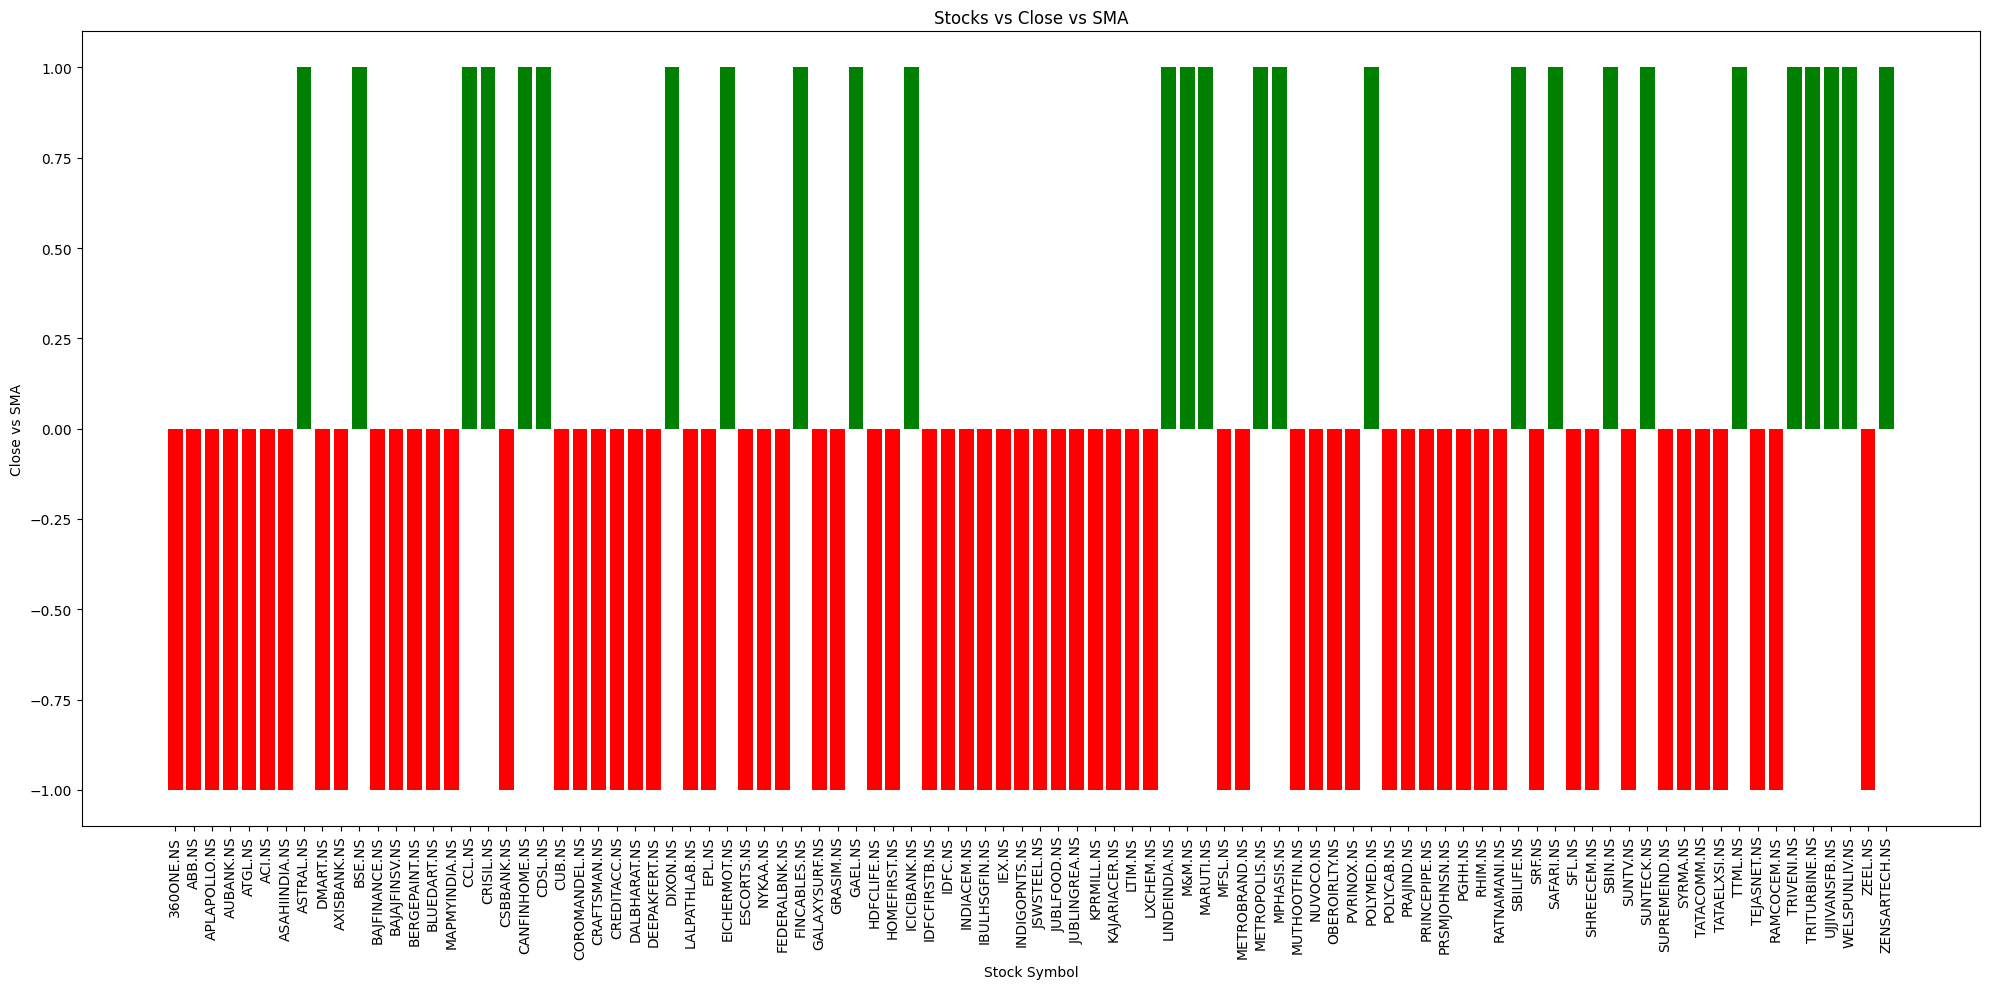

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
results_df = pd.read_csv('crossover_results.csv')

# Map 'Positive' to 1 and 'Negative' to -1
results_df['Color'] = results_df['Close vs SMA'].map({'Positive': 1, 'Negative': -1})

# Plot "Stock Symbol" vs "Close vs SMA" with green bars for positive values and red bars for negative values
plt.figure(figsize=(20, 10))
plt.bar(results_df['Stock Symbol'], results_df['Color'], color=results_df['Color'].map({1: 'green', -1: 'red'}))
plt.title('Stocks vs Close vs SMA')
plt.xlabel('Stock Symbol')
plt.ylabel('Close vs SMA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


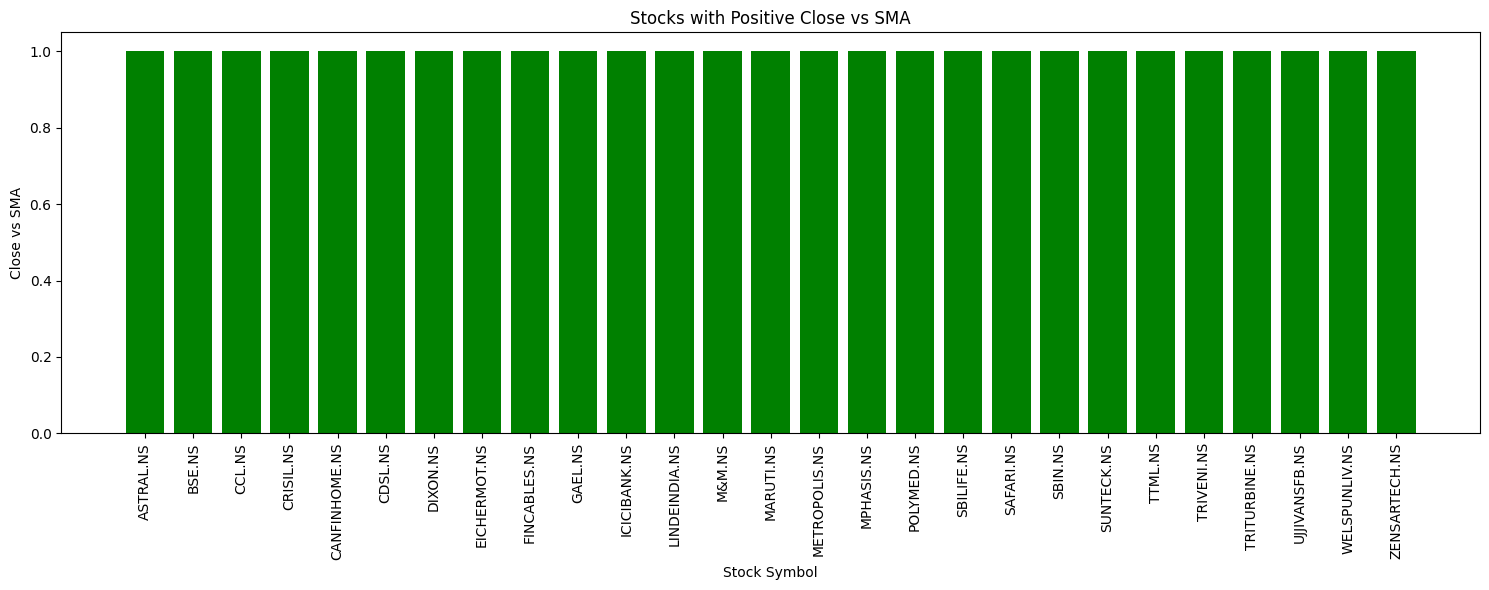

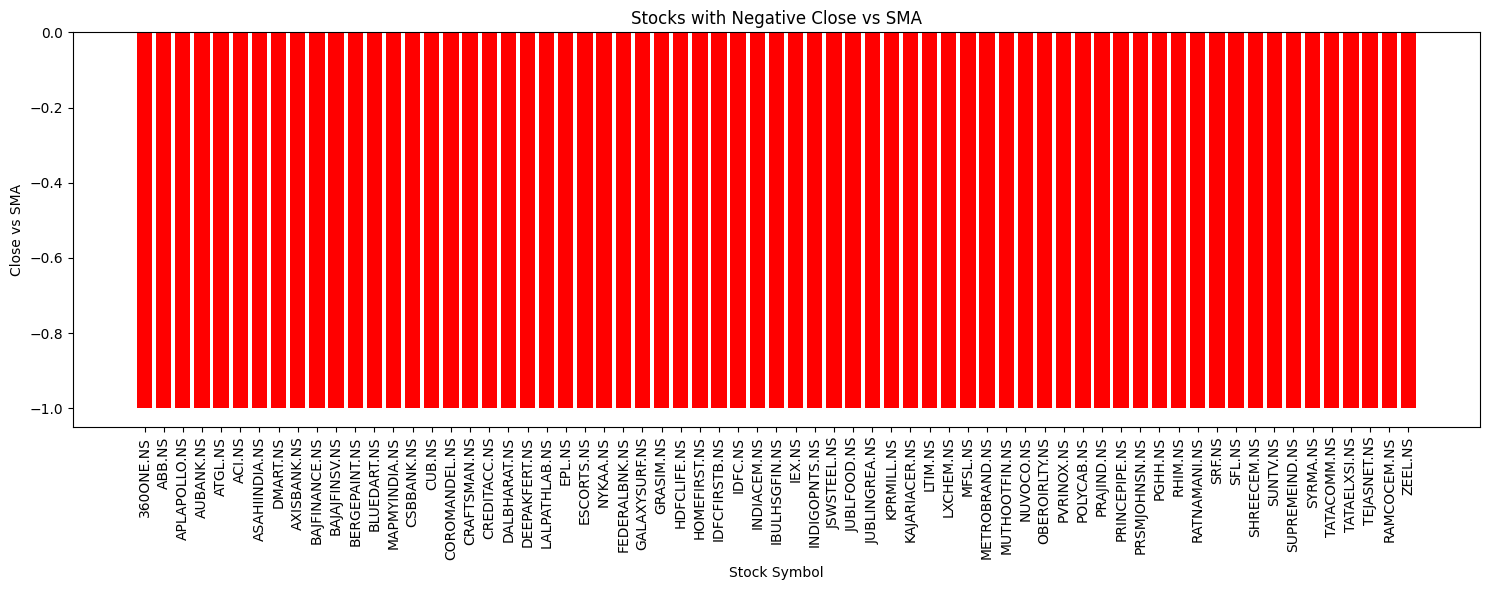

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
results_df = pd.read_csv('crossover_results.csv')

# Map 'Positive' to 1 and 'Negative' to -1
results_df['Color'] = results_df['Close vs SMA'].map({'Positive': 1, 'Negative': -1})

# Separate positive and negative values
positive_df = results_df[results_df['Color'] == 1]
negative_df = results_df[results_df['Color'] == -1]

# Plot positive values
plt.figure(figsize=(15, 6))
plt.bar(positive_df['Stock Symbol'], positive_df['Color'], color='green')
plt.title('Stocks with Positive Close vs SMA')
plt.xlabel('Stock Symbol')
plt.ylabel('Close vs SMA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot negative values
plt.figure(figsize=(15, 6))
plt.bar(negative_df['Stock Symbol'], negative_df['Color'], color='red')
plt.title('Stocks with Negative Close vs SMA')
plt.xlabel('Stock Symbol')
plt.ylabel('Close vs SMA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


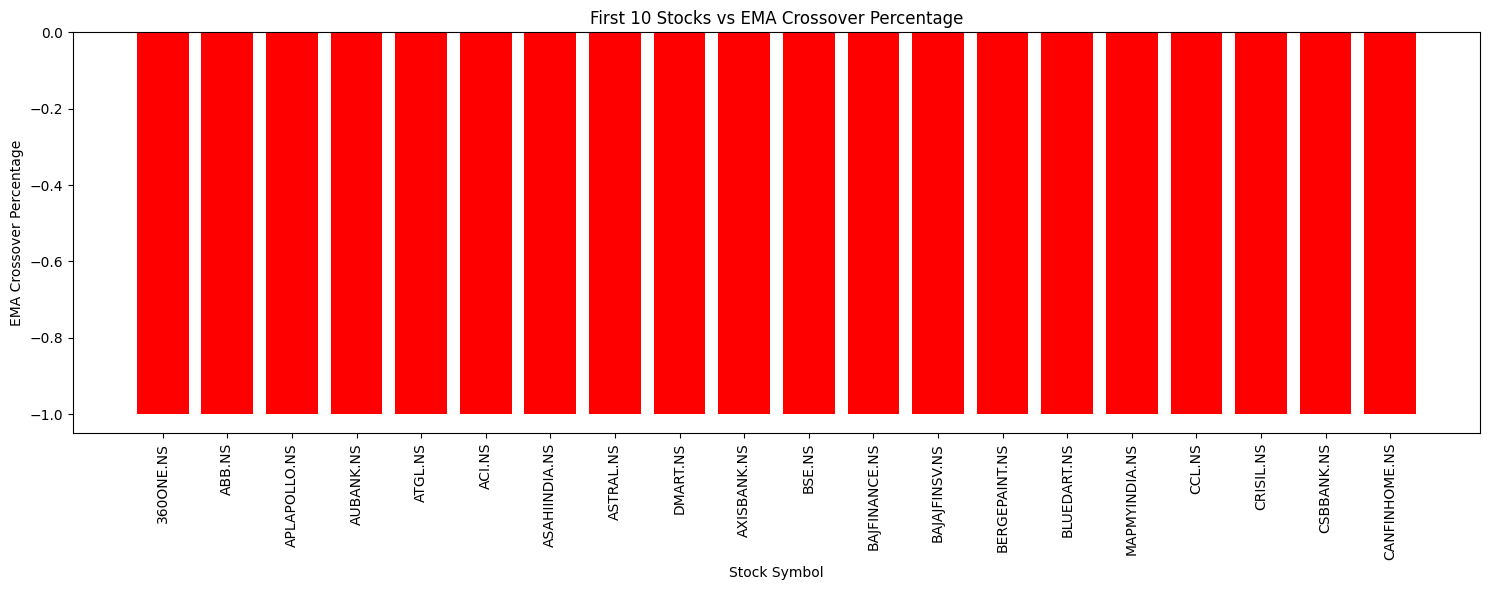

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
results_df = pd.read_csv('crossover_results.csv')

# Map 'Positive' to 1 and 'Negative' to -1 for "EMA Crossover Percentage"
results_df['Color_EMA'] = results_df['EMA Crossover Percentage'].apply(lambda x: 1 if '+' in x else -1)

# Select the first 10 rows
first_10_stocks_df = results_df.head(20)

# Plot "Stock Symbol" vs "EMA Crossover Percentage" for the first 10 stocks
plt.figure(figsize=(15, 6))
plt.bar(first_10_stocks_df['Stock Symbol'], first_10_stocks_df['Color_EMA'], color=first_10_stocks_df['Color_EMA'].map({1: 'green', -1: 'red'}))
plt.title('First 10 Stocks vs EMA Crossover Percentage')
plt.xlabel('Stock Symbol')
plt.ylabel('EMA Crossover Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [32]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for strategy signals
cross_above_25_44_list = []  # Stocks where 25-day MA crosses above 44-day MA
cross_above_44_200_list = []  # Stocks where 44-day MA crosses above 200-day MA

# Additional lists for declined and positive incline percentages
declined_percentage_list = []
positive_incline_percentage_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Define base slow and fast moving averages
        fast_ma = 25
        slow_ma_1 = 44
        slow_ma_2 = 200

        # Calculate the moving averages for the strategy
        historical_data['fast_ma'] = historical_data['Close'].rolling(window=fast_ma).mean()
        historical_data['slow_ma_1'] = historical_data['Close'].rolling(window=slow_ma_1).mean()
        historical_data['slow_ma_2'] = historical_data['Close'].rolling(window=slow_ma_2).mean()

        # Create a column with buy and sell signals
        historical_data['signal_25_44'] = np.where(
            (historical_data['fast_ma'] > historical_data['slow_ma_1']) 
            & (historical_data['fast_ma'].shift(1) <= historical_data['slow_ma_1'].shift(1)),
            1.0,
            0.0
        )

        historical_data['signal_44_200'] = np.where(
            (historical_data['slow_ma_1'] > historical_data['slow_ma_2'])
            & (historical_data['slow_ma_1'].shift(1) <= historical_data['slow_ma_2'].shift(1)),
            1.0,
            0.0
        )

        # Append symbols to lists based on signals
        if historical_data['signal_25_44'].iloc[-1] == 1:
            cross_above_25_44_list.append(ticker_symbol)

        if historical_data['signal_44_200'].iloc[-1] == 1:
            cross_above_44_200_list.append(ticker_symbol)

        # Calculate declined percentage and positive incline percentage
        declined_percentage = ((historical_data['fast_ma'].iloc[-1] - historical_data['Close'].iloc[-1]) / historical_data['fast_ma'].iloc[-1]) * 100
        positive_incline_percentage = ((historical_data['Close'].iloc[-1] - historical_data['fast_ma'].iloc[-1]) / historical_data['fast_ma'].iloc[-1]) * 100

        # Append percentages to lists
        declined_percentage_list.append(declined_percentage)
        positive_incline_percentage_list.append(positive_incline_percentage)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create a DataFrame for the declined and positive incline percentages
percentage_df = pd.DataFrame({
    'Stock Symbol': nifty50_symbols,
    'Declined Percentage': declined_percentage_list,
    'Positive Incline Percentage': positive_incline_percentage_list
})

# Print or use the created lists and DataFrame as needed
print("Stocks where 25-day MA crosses above 44-day MA:", cross_above_25_44_list)
print("Stocks where 44-day MA crosses above 200-day MA:", cross_above_44_200_list)
print("Declined and Positive Incline Percentages:")
print(percentage_df)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

In [33]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for strategy signals and additional percentages
cross_above_25_44_list = []  # Stocks where 25-day MA crosses above 44-day MA
cross_above_44_200_list = []  # Stocks where 44-day MA crosses above 200-day MA
declined_percentage_list = []  # List to store declined percentages
positive_incline_percentage_list = []  # List to store positive incline percentages

# Output file path
output_file_path = 'crossover_results_with_percentages.csv'

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Define base slow and fast moving averages
        fast_ma = 25
        slow_ma_1 = 44
        slow_ma_2 = 200

        # Calculate the moving averages for the strategy
        historical_data['fast_ma'] = historical_data['Close'].rolling(window=fast_ma).mean()
        historical_data['slow_ma_1'] = historical_data['Close'].rolling(window=slow_ma_1).mean()
        historical_data['slow_ma_2'] = historical_data['Close'].rolling(window=slow_ma_2).mean()

        # Create a column with buy and sell signals
        historical_data['signal_25_44'] = np.where(
            (historical_data['fast_ma'] > historical_data['slow_ma_1']) 
            & (historical_data['fast_ma'].shift(1) <= historical_data['slow_ma_1'].shift(1)),
            1.0,
            0.0
        )

        historical_data['signal_44_200'] = np.where(
            (historical_data['slow_ma_1'] > historical_data['slow_ma_2'])
            & (historical_data['slow_ma_1'].shift(1) <= historical_data['slow_ma_2'].shift(1)),
            1.0,
            0.0
        )

        # Append symbols to lists based on signals
        if historical_data['signal_25_44'].iloc[-1] == 1:
            cross_above_25_44_list.append(ticker_symbol)

        if historical_data['signal_44_200'].iloc[-1] == 1:
            cross_above_44_200_list.append(ticker_symbol)

        # Calculate declined percentage and positive incline percentage
        declined_percentage = ((historical_data['fast_ma'].iloc[-1] - historical_data['Close'].iloc[-1]) / historical_data['fast_ma'].iloc[-1]) * 100
        positive_incline_percentage = ((historical_data['Close'].iloc[-1] - historical_data['fast_ma'].iloc[-1]) / historical_data['fast_ma'].iloc[-1]) * 100

        # Append percentages to lists
        declined_percentage_list.append(declined_percentage)
        positive_incline_percentage_list.append(positive_incline_percentage)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create a DataFrame for the declined and positive incline percentages
percentage_df = pd.DataFrame({
    'Stock Symbol': nifty50_symbols,
    'Declined Percentage': declined_percentage_list,
    'Positive Incline Percentage': positive_incline_percentage_list
})

# Save the results to the output file
percentage_df.to_csv(output_file_path, index=False)

# Print or use the created lists and DataFrame as needed
print("Stocks where 25-day MA crosses above 44-day MA:", cross_above_25_44_list)
print("Stocks where 44-day MA crosses above 200-day MA:", cross_above_44_200_list)
print("Declined and Positive Incline Percentages:")
print(percentage_df)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

In [34]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'SMA {sma1}', f'SMA {sma2}', f'SMA {sma3}', 
                                           f'EMA {ema1}', f'EMA {ema2}', 'SMA Crossover Percentage', 'EMA Crossover Percentage', 'Close vs SMA',
                                           'Declined Percentage', 'Positive Incline Percentage'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'SMA {sma1}'] = historical_data['Close'].rolling(window=sma1).mean()
                historical_data[f'SMA {sma2}'] = historical_data['Close'].rolling(window=sma2).mean()
                historical_data[f'SMA {sma3}'] = historical_data['Close'].rolling(window=sma3).mean()
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma3}'].iloc[-1]) and \
                   (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma1}'].iloc[-1]):
                    # Calculate the percentage difference for SMA crossover
                    sma_crossover_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data[f'SMA {sma3}'].iloc[-1]) /
                                                historical_data[f'SMA {sma3}'].iloc[-1]) * 100

                    # Filter stocks with crossover by 1% or 2%
                    if abs(sma_crossover_percentage) >= 1.0:
                        # Calculate the percentage difference for EMA crossover
                        ema_crossover_percentage = ((historical_data[f'EMA {ema1}'].iloc[-1] - historical_data[f'EMA {ema2}'].iloc[-1]) /
                                                    historical_data[f'EMA {ema2}'].iloc[-1]) * 100

                        # Determine if the close price is below or above the crossover
                        close_vs_sma = 'Negative' if historical_data['Close'].iloc[-1] < historical_data[f'SMA {sma2}'].iloc[-1] else 'Positive'

                        # Calculate Declined Percentage and Positive Incline Percentage
                        declined_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data['Close'].iloc[-1]) /
                                               historical_data[f'SMA {sma2}'].iloc[-1]) * 100
                        positive_incline_percentage = ((historical_data['Close'].iloc[-1] - historical_data[f'SMA {sma2}'].iloc[-1]) /
                                                      historical_data[f'SMA {sma2}'].iloc[-1]) * 100

                        results_df = results_df.append({
                            'Stock Symbol': ticker_symbol,
                            'Close Price': historical_data['Close'].iloc[-1],
                            f'SMA {sma1}': historical_data[f'SMA {sma1}'].iloc[-1],
                            f'SMA {sma2}': historical_data[f'SMA {sma2}'].iloc[-1],
                            f'SMA {sma3}': historical_data[f'SMA {sma3}'].iloc[-1],
                            f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                            f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                            'SMA Crossover Percentage': f"{'' if sma_crossover_percentage >= 0 else '-'}{abs(sma_crossover_percentage)}%",
                            'EMA Crossover Percentage': f"{'' if ema_crossover_percentage >= 0 else '-'}{abs(ema_crossover_percentage)}%",
                            'Close vs SMA': close_vs_sma,
                            'Declined Percentage': declined_percentage,
                            'Positive Incline Percentage': positive_incline_percentage
                        }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './final_small500.txt'
    output_file = 'crossover_results_with_percentages.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/501: 360ONE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 2/501: 3MINDIA.NS
Analyzing stock 3/501: ABB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 4/501: ACC.NS
Analyzing stock 5/501: AIAENG.NS
Analyzing stock 6/501: APLAPOLLO.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 7/501: AUBANK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 8/501: AARTIDRUGS.NS
Analyzing stock 9/501: AARTIIND.NS
Analyzing stock 10/501: AAVAS.NS
Analyzing stock 11/501: ABBOTINDIA.NS
Analyzing stock 12/501: ADANIENSOL.NS
Analyzing stock 13/501: ADANIENT.NS
Analyzing stock 14/501: ADANIGREEN.NS
Analyzing stock 15/501: ADANIPORTS.NS
Analyzing stock 16/501: ADANIPOWER.NS
Analyzing stock 17/501: ATGL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 18/501: AWL.NS
Analyzing stock 19/501: ABCAPITAL.NS
Analyzing stock 20/501: ABFRL.NS
Analyzing stock 21/501: AEGISCHEM.NS
Analyzing stock 22/501: AETHER.NS
Analyzing stock 23/501: AFFLE.NS
Analyzing stock 24/501: AJANTPHARM.NS
Analyzing stock 25/501: APLLTD.NS
Analyzing stock 26/501: ALKEM.NS
Analyzing stock 27/501: ALKYLAMINE.NS
Analyzing stock 28/501: ALLCARGO.NS
Analyzing stock 29/501: ALOKINDS.NS
Analyzing stock 30/501: ARE&M.NS
Analyzing stock 31/501: AMBER.NS
Analyzing stock 32/501: AMBUJACEM.NS
Analyzing stock 33/501: ANGELONE.NS
Analyzing stock 34/501: ANURAS.NS
Analyzing stock 35/501: APARINDS.NS
Analyzing stock 36/501: APOLLOHOSP.NS
Analyzing stock 37/501: APOLLOTYRE.NS
Analyzing stock 38/501: APTUS.NS
Analyzing stock 39/501: ACI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 40/501: ASAHIINDIA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 41/501: ASHOKLEY.NS
Analyzing stock 42/501: ASIANPAINT.NS
Analyzing stock 43/501: ASTERDM.NS
Analyzing stock 44/501: ASTRAL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 45/501: ATUL.NS
Analyzing stock 46/501: AUROPHARMA.NS
Analyzing stock 47/501: AVANTIFEED.NS
Analyzing stock 48/501: DMART.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 49/501: AXISBANK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 50/501: BEML.NS
Analyzing stock 51/501: BLS.NS
Analyzing stock 52/501: BSE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 53/501: BAJAJ-AUTO.NS
Analyzing stock 54/501: BAJFINANCE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 55/501: BAJAJFINSV.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 56/501: BAJAJHLDNG.NS
Analyzing stock 57/501: BALAMINES.NS
Analyzing stock 58/501: BALKRISIND.NS
Analyzing stock 59/501: BALRAMCHIN.NS
Analyzing stock 60/501: BANDHANBNK.NS
Analyzing stock 61/501: BANKBARODA.NS
Analyzing stock 62/501: BANKINDIA.NS
Analyzing stock 63/501: MAHABANK.NS
Analyzing stock 64/501: BATAINDIA.NS
Analyzing stock 65/501: BAYERCROP.NS
Analyzing stock 66/501: BERGEPAINT.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 67/501: BDL.NS
Analyzing stock 68/501: BEL.NS
Analyzing stock 69/501: BHARATFORG.NS
Analyzing stock 70/501: BHEL.NS
Analyzing stock 71/501: BPCL.NS
Analyzing stock 72/501: BHARTIARTL.NS
Analyzing stock 73/501: BIKAJI.NS
Analyzing stock 74/501: BIOCON.NS
Analyzing stock 75/501: BIRLACORPN.NS
Analyzing stock 76/501: BSOFT.NS
Analyzing stock 77/501: BLUEDART.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 78/501: BLUESTARCO.NS
Analyzing stock 79/501: BBTC.NS
Analyzing stock 80/501: BORORENEW.NS
Analyzing stock 81/501: BOSCHLTD.NS
Analyzing stock 82/501: BRIGADE.NS
Analyzing stock 83/501: BCG.NS
Analyzing stock 84/501: BRITANNIA.NS
Analyzing stock 85/501: MAPMYINDIA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 86/501: CCL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 87/501: CESC.NS
Analyzing stock 88/501: CGPOWER.NS
Analyzing stock 89/501: CIEINDIA.NS
Analyzing stock 90/501: CRISIL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 91/501: CSBBANK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 92/501: CAMPUS.NS
Analyzing stock 93/501: CANFINHOME.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 94/501: CANBK.NS
Analyzing stock 95/501: CGCL.NS
Analyzing stock 96/501: CARBORUNIV.NS
Analyzing stock 97/501: CASTROLIND.NS
Analyzing stock 98/501: CEATLTD.NS
Analyzing stock 99/501: CENTRALBK.NS
Analyzing stock 100/501: CDSL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 101/501: CENTURYPLY.NS
Analyzing stock 102/501: CENTURYTEX.NS
Analyzing stock 103/501: CERA.NS
Analyzing stock 104/501: CHALET.NS
Analyzing stock 105/501: CHAMBLFERT.NS
Analyzing stock 106/501: CHEMPLASTS.NS
Analyzing stock 107/501: CHOLAHLDNG.NS
Analyzing stock 108/501: CHOLAFIN.NS
Analyzing stock 109/501: CIPLA.NS
Analyzing stock 110/501: CUB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 111/501: CLEAN.NS
Analyzing stock 112/501: COALINDIA.NS
Analyzing stock 113/501: COCHINSHIP.NS
Analyzing stock 114/501: COFORGE.NS
Analyzing stock 115/501: COLPAL.NS
Analyzing stock 116/501: CAMS.NS
Analyzing stock 117/501: CONCORDBIO.NS
Analyzing stock 118/501: CONCOR.NS
Analyzing stock 119/501: COROMANDEL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 120/501: CRAFTSMAN.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 121/501: CREDITACC.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 122/501: CROMPTON.NS
Analyzing stock 123/501: CUMMINSIND.NS
Analyzing stock 124/501: CYIENT.NS
Analyzing stock 125/501: DCMSHRIRAM.NS
Analyzing stock 126/501: DLF.NS
Analyzing stock 127/501: DABUR.NS
Analyzing stock 128/501: DALBHARAT.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 129/501: DATAPATTNS.NS
Analyzing stock 130/501: DEEPAKFERT.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 131/501: DEEPAKNTR.NS
Analyzing stock 132/501: DELHIVERY.NS
Analyzing stock 133/501: DELTACORP.NS
Analyzing stock 134/501: DEVYANI.NS
Analyzing stock 135/501: DIVISLAB.NS
Analyzing stock 136/501: DIXON.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 137/501: LALPATHLAB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 138/501: DRREDDY.NS
Analyzing stock 139/501: EIDPARRY.NS
Analyzing stock 140/501: EIHOTEL.NS
Analyzing stock 141/501: EPL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 142/501: EASEMYTRIP.NS
Analyzing stock 143/501: EICHERMOT.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 144/501: ELGIEQUIP.NS
Analyzing stock 145/501: EMAMILTD.NS
Analyzing stock 146/501: ENDURANCE.NS
Analyzing stock 147/501: ENGINERSIN.NS
Analyzing stock 148/501: EPIGRAL.NS
Analyzing stock 149/501: EQUITASBNK.NS
Analyzing stock 150/501: ERIS.NS
Analyzing stock 151/501: ESCORTS.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 152/501: EXIDEIND.NS
Analyzing stock 153/501: FDC.NS
Analyzing stock 154/501: NYKAA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 155/501: FEDERALBNK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 156/501: FACT.NS
Analyzing stock 157/501: FINEORG.NS
Analyzing stock 158/501: FINCABLES.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 159/501: FINPIPE.NS
Analyzing stock 160/501: FSL.NS
Analyzing stock 161/501: FIVESTAR.NS
Analyzing stock 162/501: FORTIS.NS
Analyzing stock 163/501: GRINFRA.NS
Analyzing stock 164/501: GAIL.NS
Analyzing stock 165/501: GMMPFAUDLR.NS
Analyzing stock 166/501: GMRINFRA.NS
Analyzing stock 167/501: GALAXYSURF.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 168/501: GICRE.NS
Analyzing stock 169/501: GILLETTE.NS
Analyzing stock 170/501: GLAND.NS
Analyzing stock 171/501: GLAXO.NS
Analyzing stock 172/501: GLS.NS
Analyzing stock 173/501: GLENMARK.NS
Analyzing stock 174/501: MEDANTA.NS
Analyzing stock 175/501: GOCOLORS.NS
Analyzing stock 176/501: GPIL.NS
Analyzing stock 177/501: GODFRYPHLP.NS
Analyzing stock 178/501: GODREJCP.NS
Analyzing stock 179/501: GODREJIND.NS
Analyzing stock 180/501: GODREJPROP.NS
Analyzing stock 181/501: GRANULES.NS
Analyzing stock 182/501: GRAPHITE.NS
Analyzing stock 183/501: GRASIM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 184/501: GESHIP.NS
Analyzing stock 185/501: GRINDWELL.NS
Analyzing stock 186/501: GUJALKALI.NS
Analyzing stock 187/501: GAEL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 188/501: FLUOROCHEM.NS
Analyzing stock 189/501: GUJGASLTD.NS
Analyzing stock 190/501: GNFC.NS
Analyzing stock 191/501: GPPL.NS
Analyzing stock 192/501: GSFC.NS
Analyzing stock 193/501: GSPL.NS
Analyzing stock 194/501: HEG.NS
Analyzing stock 195/501: HCLTECH.NS
Analyzing stock 196/501: HDFCAMC.NS
Analyzing stock 197/501: HDFCBANK.NS
Analyzing stock 198/501: HDFCLIFE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 199/501: HFCL.NS
Analyzing stock 200/501: HLEGLAS.NS
Analyzing stock 201/501: HAPPSTMNDS.NS
Analyzing stock 202/501: HAVELLS.NS
Analyzing stock 203/501: HEROMOTOCO.NS
Analyzing stock 204/501: HINDALCO.NS
Analyzing stock 205/501: HAL.NS
Analyzing stock 206/501: HINDCOPPER.NS
Analyzing stock 207/501: HINDPETRO.NS
Analyzing stock 208/501: HINDUNILVR.NS
Analyzing stock 209/501: HINDZINC.NS
Analyzing stock 210/501: POWERINDIA.NS
Analyzing stock 211/501: HOMEFIRST.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 212/501: HONAUT.NS
Analyzing stock 213/501: HUDCO.NS
Analyzing stock 214/501: ICICIBANK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 215/501: ICICIGI.NS
Analyzing stock 216/501: ICICIPRULI.NS
Analyzing stock 217/501: ISEC.NS
Analyzing stock 218/501: IDBI.NS
Analyzing stock 219/501: IDFCFIRSTB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 220/501: IDFC.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 221/501: IIFL.NS
Analyzing stock 222/501: IRB.NS
Analyzing stock 223/501: IRCON.NS
Analyzing stock 224/501: ITC.NS
Analyzing stock 225/501: ITI.NS
Analyzing stock 226/501: INDIACEM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 227/501: IBULHSGFIN.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 228/501: INDIAMART.NS
Analyzing stock 229/501: INDIANB.NS
Analyzing stock 230/501: IEX.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 231/501: INDHOTEL.NS
Analyzing stock 232/501: IOC.NS
Analyzing stock 233/501: IOB.NS
Analyzing stock 234/501: IRCTC.NS
Analyzing stock 235/501: IRFC.NS
Analyzing stock 236/501: INDIGOPNTS.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 237/501: IGL.NS
Analyzing stock 238/501: INDUSTOWER.NS
Analyzing stock 239/501: INDUSINDBK.NS
Analyzing stock 240/501: INFIBEAM.NS
Analyzing stock 241/501: NAUKRI.NS
Analyzing stock 242/501: INFY.NS
Analyzing stock 243/501: INGERRAND.NS
Analyzing stock 244/501: INTELLECT.NS
Analyzing stock 245/501: INDIGO.NS
Analyzing stock 246/501: IPCALAB.NS
Analyzing stock 247/501: JBCHEPHARM.NS
Analyzing stock 248/501: JKCEMENT.NS
Analyzing stock 249/501: JBMA.NS
Analyzing stock 250/501: JKLAKSHMI.NS
Analyzing stock 251/501: JKPAPER.NS
Analyzing stock 252/501: JMFINANCIL.NS
Analyzing stock 253/501: JSWENERGY.NS
Analyzing stock 254/501: JSWSTEEL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 255/501: JAMNAAUTO.NS
Analyzing stock 256/501: JINDALSAW.NS
Analyzing stock 257/501: JSL.NS
Analyzing stock 258/501: JINDALSTEL.NS
Analyzing stock 259/501: JUBLFOOD.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 260/501: JUBLINGREA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 261/501: JUBLPHARMA.NS
Analyzing stock 262/501: JUSTDIAL.NS
Analyzing stock 263/501: JYOTHYLAB.NS
Analyzing stock 264/501: KPRMILL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 265/501: KEI.NS
Analyzing stock 266/501: KNRCON.NS
Analyzing stock 267/501: KPITTECH.NS
Analyzing stock 268/501: KRBL.NS
Analyzing stock 269/501: KSB.NS
Analyzing stock 270/501: KAJARIACER.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 271/501: KPIL.NS
Analyzing stock 272/501: KALYANKJIL.NS
Analyzing stock 273/501: KANSAINER.NS
Analyzing stock 274/501: KARURVYSYA.NS
Analyzing stock 275/501: KAYNES.NS
Analyzing stock 276/501: KEC.NS
Analyzing stock 277/501: KFINTECH.NS
Analyzing stock 278/501: KOTAKBANK.NS
Analyzing stock 279/501: KIMS.NS
Analyzing stock 280/501: L&TFH.NS
Analyzing stock 281/501: LTTS.NS
Analyzing stock 282/501: LICHSGFIN.NS
Analyzing stock 283/501: LTIM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 284/501: LAXMIMACH.NS
Analyzing stock 285/501: LT.NS
Analyzing stock 286/501: LATENTVIEW.NS
Analyzing stock 287/501: LAURUSLABS.NS
Analyzing stock 288/501: LXCHEM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 289/501: LEMONTREE.NS
Analyzing stock 290/501: LICI.NS
Analyzing stock 291/501: LINDEINDIA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 292/501: LUPIN.NS
Analyzing stock 293/501: LUXIND.NS
Analyzing stock 294/501: MMTC.NS
Analyzing stock 295/501: MRF.NS
Analyzing stock 296/501: MTARTECH.NS
Analyzing stock 297/501: LODHA.NS
Analyzing stock 298/501: MGL.NS
Analyzing stock 299/501: M&MFIN.NS
Analyzing stock 300/501: M&M.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 301/501: MHRIL.NS
Analyzing stock 302/501: MAHLIFE.NS
Analyzing stock 303/501: MANAPPURAM.NS
Analyzing stock 304/501: MRPL.NS
Analyzing stock 305/501: MANKIND.NS
Analyzing stock 306/501: MARICO.NS
Analyzing stock 307/501: MARUTI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 308/501: MASTEK.NS
Analyzing stock 309/501: MFSL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 310/501: MAXHEALTH.NS
Analyzing stock 311/501: MAZDOCK.NS
Analyzing stock 312/501: MEDPLUS.NS
Analyzing stock 313/501: METROBRAND.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 314/501: METROPOLIS.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 315/501: MINDACORP.NS
Analyzing stock 316/501: MSUMI.NS
Analyzing stock 317/501: MOTILALOFS.NS
Analyzing stock 318/501: MPHASIS.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 319/501: MCX.NS
Analyzing stock 320/501: MUTHOOTFIN.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 321/501: NATCOPHARM.NS
Analyzing stock 322/501: NBCC.NS
Analyzing stock 323/501: NCC.NS
Analyzing stock 324/501: NHPC.NS
Analyzing stock 325/501: NLCINDIA.NS
Analyzing stock 326/501: NMDC.NS
Analyzing stock 327/501: NSLNISP.NS
Analyzing stock 328/501: NTPC.NS
Analyzing stock 329/501: NH.NS
Analyzing stock 330/501: NATIONALUM.NS
Analyzing stock 331/501: NAVINFLUOR.NS
Analyzing stock 332/501: NAZARA.NS
Analyzing stock 333/501: NESTLEIND.NS
Analyzing stock 334/501: NETWORK18.NS
Analyzing stock 335/501: NAM-INDIA.NS
Analyzing stock 336/501: NUVOCO.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 337/501: OBEROIRLTY.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 338/501: ONGC.NS
Analyzing stock 339/501: OIL.NS
Analyzing stock 340/501: OLECTRA.NS
Analyzing stock 341/501: PAYTM.NS
Analyzing stock 342/501: OFSS.NS
Analyzing stock 343/501: ORIENTELEC.NS
Analyzing stock 344/501: POLICYBZR.NS
Analyzing stock 345/501: PCBL.NS
Analyzing stock 346/501: PIIND.NS
Analyzing stock 347/501: PNBHOUSING.NS
Analyzing stock 348/501: PNCINFRA.NS
Analyzing stock 349/501: PVRINOX.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 350/501: PAGEIND.NS
Analyzing stock 351/501: PATANJALI.NS
Analyzing stock 352/501: PERSISTENT.NS
Analyzing stock 353/501: PETRONET.NS
Analyzing stock 354/501: PFIZER.NS
Analyzing stock 355/501: PHOENIXLTD.NS
Analyzing stock 356/501: PIDILITIND.NS
Analyzing stock 357/501: PEL.NS
Analyzing stock 358/501: PPLPHARMA.NS
Analyzing stock 359/501: POLYMED.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 360/501: POLYCAB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 361/501: POLYPLEX.NS
Analyzing stock 362/501: POONAWALLA.NS
Analyzing stock 363/501: PFC.NS
Analyzing stock 364/501: POWERGRID.NS
Analyzing stock 365/501: PRAJIND.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 366/501: PRESTIGE.NS
Analyzing stock 367/501: PRINCEPIPE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 368/501: PRSMJOHNSN.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 369/501: PGHL.NS
Analyzing stock 370/501: PGHH.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 371/501: PNB.NS
Analyzing stock 372/501: QUESS.NS
Analyzing stock 373/501: RBLBANK.NS
Analyzing stock 374/501: RECLTD.NS
Analyzing stock 375/501: RHIM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 376/501: RITES.NS
Analyzing stock 377/501: RADICO.NS
Analyzing stock 378/501: RVNL.NS
Analyzing stock 379/501: RAIN.NS
Analyzing stock 380/501: RAINBOW.NS
Analyzing stock 381/501: RAJESHEXPO.NS
Analyzing stock 382/501: RALLIS.NS
Analyzing stock 383/501: RCF.NS
Analyzing stock 384/501: RATNAMANI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 385/501: RTNINDIA.NS
Analyzing stock 386/501: RAYMOND.NS
Analyzing stock 387/501: REDINGTON.NS
Analyzing stock 388/501: RELAXO.NS
Analyzing stock 389/501: RELIANCE.NS
Analyzing stock 390/501: RBA.NS
Analyzing stock 391/501: ROSSARI.NS
Analyzing stock 392/501: ROUTE.NS
Analyzing stock 393/501: SBICARD.NS
Analyzing stock 394/501: SBILIFE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 395/501: SJVN.NS
Analyzing stock 396/501: SKFINDIA.NS
Analyzing stock 397/501: SRF.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 398/501: SAFARI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 399/501: MOTHERSON.NS
Analyzing stock 400/501: SANOFI.NS
Analyzing stock 401/501: SAPPHIRE.NS
Analyzing stock 402/501: SAREGAMA.NS
Analyzing stock 403/501: SCHAEFFLER.NS
Analyzing stock 404/501: SHARDACROP.NS
Analyzing stock 405/501: SFL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 406/501: SHOPERSTOP.NS
Analyzing stock 407/501: SHREECEM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 408/501: RENUKA.NS
Analyzing stock 409/501: SHRIRAMFIN.NS
Analyzing stock 410/501: SHYAMMETL.NS
Analyzing stock 411/501: SIEMENS.NS
Analyzing stock 412/501: SOBHA.NS
Analyzing stock 413/501: SOLARINDS.NS
Analyzing stock 414/501: SONACOMS.NS
Analyzing stock 415/501: SONATSOFTW.NS
Analyzing stock 416/501: STARHEALTH.NS
Analyzing stock 417/501: SBIN.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 418/501: SAIL.NS
Analyzing stock 419/501: SWSOLAR.NS
Analyzing stock 420/501: STLTECH.NS
Analyzing stock 421/501: SUMICHEM.NS
Analyzing stock 422/501: SPARC.NS
Analyzing stock 423/501: SUNPHARMA.NS
Analyzing stock 424/501: SUNTV.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 425/501: SUNDARMFIN.NS
Analyzing stock 426/501: SUNDRMFAST.NS
Analyzing stock 427/501: SUNTECK.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 428/501: SUPRAJIT.NS
Analyzing stock 429/501: SUPREMEIND.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 430/501: SUVENPHAR.NS
Analyzing stock 431/501: SUZLON.NS
Analyzing stock 432/501: SWANENERGY.NS
Analyzing stock 433/501: SYMPHONY.NS
Analyzing stock 434/501: SYNGENE.NS
Analyzing stock 435/501: SYRMA.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 436/501: TTKPRESTIG.NS
Analyzing stock 437/501: TV18BRDCST.NS
Analyzing stock 438/501: TVSMOTOR.NS
Analyzing stock 439/501: TANLA.NS
Analyzing stock 440/501: TATACHEM.NS
Analyzing stock 441/501: TATACOMM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 442/501: TCS.NS
Analyzing stock 443/501: TATACONSUM.NS
Analyzing stock 444/501: TATAELXSI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 445/501: TATAINVEST.NS
Analyzing stock 446/501: TATAMTRDVR.NS
Analyzing stock 447/501: TATAMOTORS.NS
Analyzing stock 448/501: TATAPOWER.NS
Analyzing stock 449/501: TATASTEEL.NS
Analyzing stock 450/501: TTML.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 451/501: TEAMLEASE.NS
Analyzing stock 452/501: TECHM.NS
Analyzing stock 453/501: TEJASNET.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 454/501: NIACL.NS
Analyzing stock 455/501: RAMCOCEM.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 456/501: THERMAX.NS
Analyzing stock 457/501: TIMKEN.NS
Analyzing stock 458/501: TITAN.NS
Analyzing stock 459/501: TORNTPHARM.NS
Analyzing stock 460/501: TORNTPOWER.NS
Analyzing stock 461/501: TRENT.NS
Analyzing stock 462/501: TRIDENT.NS
Analyzing stock 463/501: TRIVENI.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 464/501: TRITURBINE.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 465/501: TIINDIA.NS
Analyzing stock 466/501: UCOBANK.NS
Analyzing stock 467/501: UNOMINDA.NS
Analyzing stock 468/501: UPL.NS
Analyzing stock 469/501: UTIAMC.NS
Analyzing stock 470/501: UJJIVANSFB.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 471/501: ULTRACEMCO.NS
Analyzing stock 472/501: UNIONBANK.NS
Analyzing stock 473/501: UBL.NS
Analyzing stock 474/501: MCDOWELL-N.NS
Analyzing stock 475/501: USHAMART.NS
Analyzing stock 476/501: VGUARD.NS
Analyzing stock 477/501: VMART.NS
Analyzing stock 478/501: VIPIND.NS
Analyzing stock 479/501: VAIBHAVGBL.NS
Analyzing stock 480/501: VTL.NS
Analyzing stock 481/501: VARROC.NS
Analyzing stock 482/501: VBL.NS
Analyzing stock 483/501: MANYAVAR.NS
Analyzing stock 484/501: VEDL.NS
Analyzing stock 485/501: VIJAYA.NS
Analyzing stock 486/501: VINATIORGA.NS
Analyzing stock 487/501: IDEA.NS
Analyzing stock 488/501: VOLTAS.NS
Analyzing stock 489/501: WELCORP.NS
Analyzing stock 490/501: WELSPUNLIV.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 491/501: WESTLIFE.NS
Analyzing stock 492/501: WHIRLPOOL.NS
Analyzing stock 493/501: WIPRO.NS
Analyzing stock 494/501: YESBANK.NS
Analyzing stock 495/501: ZFCVINDIA.NS
Analyzing stock 496/501: ZEEL.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 497/501: ZENSARTECH.NS


/tmp/ipykernel_6123/3171514268.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Analyzing stock 498/501: ZOMATO.NS
Analyzing stock 499/501: ZYDUSLIFE.NS
Analyzing stock 500/501: ZYDUSWELL.NS
Analyzing stock 501/501: ECLERX.NS

Results:
     Stock Symbol  Close Price       SMA 25       SMA 44      SMA 200  \
0       360ONE.NS   629.900024   641.595229   648.639314   516.895829   
1          ABB.NS  4406.149902  4727.288008  4736.375011  4288.737307   
2    APLAPOLLO.NS  1396.500000  1508.979985  1546.988625  1476.778340   
3       AUBANK.NS   613.799988   724.093989   739.095449   729.728979   
4         ATGL.NS   996.400024  1030.015999  1030.648863   746.047045   
..            ...          ...          ...          ...          ...   
89  TRITURBINE.NS   420.500000   396.249999   403.553409   395.907751   
90  UJJIVANSFB.NS    58.450001    57.526000    57.797727    47.788708   
91  WELSPUNLIV.NS   153.100006   150.723999   150.945454   122.747391   
92        ZEEL.NS   176.449997   223.665999   244.599998   233.848000   
93  ZENSARTECH.NS   593.150024   568.6949

In [49]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

class StockAnalyzer:
    def __init__(self, nifty50_symbols_file):
        self.nifty50_symbols_file = nifty50_symbols_file

    def analyze_stocks(self, sma1, sma2, sma3, ema1, ema2, output_file):
        # Read NIFTY 50 symbols from the text file into a list
        with open(self.nifty50_symbols_file, 'r') as file:
            nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

        # Create a DataFrame for storing results
        results_df = pd.DataFrame(columns=['Stock Symbol', 'Close Price', f'SMA {sma1}', f'SMA {sma2}', f'SMA {sma3}', 
                                           f'EMA {ema1}', f'EMA {ema2}', 'SMA Crossover Percentage', 'EMA Crossover Percentage', 'Close vs SMA',
                                           'Declined Percentage', 'Positive Incline Percentage'])

        for i, ticker_symbol in enumerate(nifty50_symbols, start=1):
            try:
                # Print progress and stock name
                print(f"Analyzing stock {i}/{len(nifty50_symbols)}: {ticker_symbol}")

                # Create a Ticker object
                ticker = yf.Ticker(ticker_symbol)

                # Set the date range for historical data
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                # Get the historical data for the stock within the specified date range
                historical_data = ticker.history(start=start_date, end=end_date)

                # Check if historical data is available for the specified date range
                if historical_data.empty:
                    continue

                # Calculate the moving averages for the strategy
                historical_data[f'SMA {sma1}'] = historical_data['Close'].rolling(window=sma1).mean()
                historical_data[f'SMA {sma2}'] = historical_data['Close'].rolling(window=sma2).mean()
                historical_data[f'SMA {sma3}'] = historical_data['Close'].rolling(window=sma3).mean()
                historical_data[f'EMA {ema1}'] = historical_data['Close'].ewm(span=ema1, adjust=False).mean()
                historical_data[f'EMA {ema2}'] = historical_data['Close'].ewm(span=ema2, adjust=False).mean()

                # Check conditions for crossovers
                if (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma3}'].iloc[-1]) and \
                   (historical_data[f'SMA {sma2}'].iloc[-1] > historical_data[f'SMA {sma1}'].iloc[-1]):
                    # Calculate the percentage difference for SMA crossover
                    sma_crossover_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data[f'SMA {sma3}'].iloc[-1]) /
                                                historical_data[f'SMA {sma3}'].iloc[-1]) * 100

                    # Filter stocks with crossover by 1% or 2%
                    if abs(sma_crossover_percentage) >= 1.0:
                        # Calculate the percentage difference for EMA crossover
                        ema_crossover_percentage = ((historical_data[f'EMA {ema1}'].iloc[-1] - historical_data[f'EMA {ema2}'].iloc[-1]) /
                                                    historical_data[f'EMA {ema2}'].iloc[-1]) * 100

                        # Determine if the close price is below or above the crossover
                        close_vs_sma = 'Negative' if historical_data['Close'].iloc[-1] < historical_data[f'SMA {sma2}'].iloc[-1] else 'Positive'

                        # Calculate Declined Percentage and Positive Incline Percentage
                        declined_percentage = ((historical_data[f'SMA {sma2}'].iloc[-1] - historical_data['Close'].iloc[-1]) /
                                               historical_data[f'SMA {sma2}'].iloc[-1]) * 100
                        positive_incline_percentage = ((historical_data['Close'].iloc[-1] - historical_data[f'SMA {sma2}'].iloc[-1]) /
                                                      historical_data[f'SMA {sma2}'].iloc[-1]) * 100

                        # Format percentages with plus sign for positive values
                        sma_crossover_percentage_str = f"{'' if sma_crossover_percentage >= 0 else '-'}{abs(sma_crossover_percentage)}%"
                        ema_crossover_percentage_str = f"{'' if ema_crossover_percentage >= 0 else '-'}{abs(ema_crossover_percentage)}%"
                        declined_percentage_str = f"{'' if declined_percentage >= 0 else '-'}{abs(declined_percentage)}%"
                        positive_incline_percentage_str = f"{'' if positive_incline_percentage >= 0 else '-'}{abs(positive_incline_percentage)}%"

                        results_df = results_df.append({
                            'Stock Symbol': ticker_symbol,
                            'Close Price': historical_data['Close'].iloc[-1],
                            f'SMA {sma1}': historical_data[f'SMA {sma1}'].iloc[-1],
                            f'SMA {sma2}': historical_data[f'SMA {sma2}'].iloc[-1],
                            f'SMA {sma3}': historical_data[f'SMA {sma3}'].iloc[-1],
                            f'EMA {ema1}': historical_data[f'EMA {ema1}'].iloc[-1],
                            f'EMA {ema2}': historical_data[f'EMA {ema2}'].iloc[-1],
                            'SMA Crossover Percentage': sma_crossover_percentage_str,
                            'EMA Crossover Percentage': ema_crossover_percentage_str,
                            'Close vs SMA': close_vs_sma,
                            'Declined Percentage': declined_percentage_str,
                            'Positive Incline Percentage': positive_incline_percentage_str
                        }, ignore_index=True)

            except Exception as e:
                print(f"Error analyzing {ticker_symbol}: {e}")

        # Save results to a CSV file
        results_df.to_csv(output_file, index=False)

        # Print results in the console
        print("\nResults:")
        print(results_df)

        print(f"\nAnalysis completed. Results saved in {output_file}")

if __name__ == "__main__":
    nifty50_symbols_file = './final_small500.txt'
    output_file = 'smallcap_crossover_results_with_percentages.csv'

    analyzer = StockAnalyzer(nifty50_symbols_file)

    # Set user-defined values for moving averages
    sma1, sma2, sma3 = 25, 44, 200
    ema1, ema2 = 44, 200

    analyzer.analyze_stocks(sma1, sma2, sma3, ema1, ema2, output_file)


Analyzing stock 1/501: 360ONE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 2/501: 3MINDIA.NS
Analyzing stock 3/501: ABB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 4/501: ACC.NS
Analyzing stock 5/501: AIAENG.NS
Analyzing stock 6/501: APLAPOLLO.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 7/501: AUBANK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 8/501: AARTIDRUGS.NS
Analyzing stock 9/501: AARTIIND.NS
Analyzing stock 10/501: AAVAS.NS
Analyzing stock 11/501: ABBOTINDIA.NS
Analyzing stock 12/501: ADANIENSOL.NS
Analyzing stock 13/501: ADANIENT.NS
Analyzing stock 14/501: ADANIGREEN.NS
Analyzing stock 15/501: ADANIPORTS.NS
Analyzing stock 16/501: ADANIPOWER.NS
Analyzing stock 17/501: ATGL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 18/501: AWL.NS
Analyzing stock 19/501: ABCAPITAL.NS
Analyzing stock 20/501: ABFRL.NS
Analyzing stock 21/501: AEGISCHEM.NS
Analyzing stock 22/501: AETHER.NS
Analyzing stock 23/501: AFFLE.NS
Analyzing stock 24/501: AJANTPHARM.NS
Analyzing stock 25/501: APLLTD.NS
Analyzing stock 26/501: ALKEM.NS
Analyzing stock 27/501: ALKYLAMINE.NS
Analyzing stock 28/501: ALLCARGO.NS
Analyzing stock 29/501: ALOKINDS.NS
Analyzing stock 30/501: ARE&M.NS
Analyzing stock 31/501: AMBER.NS
Analyzing stock 32/501: AMBUJACEM.NS
Analyzing stock 33/501: ANGELONE.NS
Analyzing stock 34/501: ANURAS.NS
Analyzing stock 35/501: APARINDS.NS
Analyzing stock 36/501: APOLLOHOSP.NS
Analyzing stock 37/501: APOLLOTYRE.NS
Analyzing stock 38/501: APTUS.NS
Analyzing stock 39/501: ACI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 40/501: ASAHIINDIA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 41/501: ASHOKLEY.NS
Analyzing stock 42/501: ASIANPAINT.NS
Analyzing stock 43/501: ASTERDM.NS
Analyzing stock 44/501: ASTRAL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 45/501: ATUL.NS
Analyzing stock 46/501: AUROPHARMA.NS
Analyzing stock 47/501: AVANTIFEED.NS
Analyzing stock 48/501: DMART.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 49/501: AXISBANK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 50/501: BEML.NS
Analyzing stock 51/501: BLS.NS
Analyzing stock 52/501: BSE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 53/501: BAJAJ-AUTO.NS
Analyzing stock 54/501: BAJFINANCE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 55/501: BAJAJFINSV.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 56/501: BAJAJHLDNG.NS
Analyzing stock 57/501: BALAMINES.NS
Analyzing stock 58/501: BALKRISIND.NS
Analyzing stock 59/501: BALRAMCHIN.NS
Analyzing stock 60/501: BANDHANBNK.NS
Analyzing stock 61/501: BANKBARODA.NS
Analyzing stock 62/501: BANKINDIA.NS
Analyzing stock 63/501: MAHABANK.NS
Analyzing stock 64/501: BATAINDIA.NS
Analyzing stock 65/501: BAYERCROP.NS
Analyzing stock 66/501: BERGEPAINT.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 67/501: BDL.NS
Analyzing stock 68/501: BEL.NS
Analyzing stock 69/501: BHARATFORG.NS
Analyzing stock 70/501: BHEL.NS
Analyzing stock 71/501: BPCL.NS
Analyzing stock 72/501: BHARTIARTL.NS
Analyzing stock 73/501: BIKAJI.NS
Analyzing stock 74/501: BIOCON.NS
Analyzing stock 75/501: BIRLACORPN.NS
Analyzing stock 76/501: BSOFT.NS
Analyzing stock 77/501: BLUEDART.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 78/501: BLUESTARCO.NS
Analyzing stock 79/501: BBTC.NS
Analyzing stock 80/501: BORORENEW.NS
Analyzing stock 81/501: BOSCHLTD.NS
Analyzing stock 82/501: BRIGADE.NS
Analyzing stock 83/501: BCG.NS
Analyzing stock 84/501: BRITANNIA.NS
Analyzing stock 85/501: MAPMYINDIA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 86/501: CCL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 87/501: CESC.NS
Analyzing stock 88/501: CGPOWER.NS
Analyzing stock 89/501: CIEINDIA.NS
Analyzing stock 90/501: CRISIL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 91/501: CSBBANK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 92/501: CAMPUS.NS
Analyzing stock 93/501: CANFINHOME.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 94/501: CANBK.NS
Analyzing stock 95/501: CGCL.NS
Analyzing stock 96/501: CARBORUNIV.NS
Analyzing stock 97/501: CASTROLIND.NS
Analyzing stock 98/501: CEATLTD.NS
Analyzing stock 99/501: CENTRALBK.NS
Analyzing stock 100/501: CDSL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 101/501: CENTURYPLY.NS
Analyzing stock 102/501: CENTURYTEX.NS
Analyzing stock 103/501: CERA.NS
Analyzing stock 104/501: CHALET.NS
Analyzing stock 105/501: CHAMBLFERT.NS
Analyzing stock 106/501: CHEMPLASTS.NS
Analyzing stock 107/501: CHOLAHLDNG.NS
Analyzing stock 108/501: CHOLAFIN.NS
Analyzing stock 109/501: CIPLA.NS
Analyzing stock 110/501: CUB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 111/501: CLEAN.NS
Analyzing stock 112/501: COALINDIA.NS
Analyzing stock 113/501: COCHINSHIP.NS
Analyzing stock 114/501: COFORGE.NS
Analyzing stock 115/501: COLPAL.NS
Analyzing stock 116/501: CAMS.NS
Analyzing stock 117/501: CONCORDBIO.NS
Analyzing stock 118/501: CONCOR.NS
Analyzing stock 119/501: COROMANDEL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 120/501: CRAFTSMAN.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 121/501: CREDITACC.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 122/501: CROMPTON.NS
Analyzing stock 123/501: CUMMINSIND.NS
Analyzing stock 124/501: CYIENT.NS
Analyzing stock 125/501: DCMSHRIRAM.NS
Analyzing stock 126/501: DLF.NS
Analyzing stock 127/501: DABUR.NS
Analyzing stock 128/501: DALBHARAT.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 129/501: DATAPATTNS.NS
Analyzing stock 130/501: DEEPAKFERT.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 131/501: DEEPAKNTR.NS
Analyzing stock 132/501: DELHIVERY.NS
Analyzing stock 133/501: DELTACORP.NS
Analyzing stock 134/501: DEVYANI.NS
Analyzing stock 135/501: DIVISLAB.NS
Analyzing stock 136/501: DIXON.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 137/501: LALPATHLAB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 138/501: DRREDDY.NS
Analyzing stock 139/501: EIDPARRY.NS
Analyzing stock 140/501: EIHOTEL.NS
Analyzing stock 141/501: EPL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 142/501: EASEMYTRIP.NS
Analyzing stock 143/501: EICHERMOT.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 144/501: ELGIEQUIP.NS
Analyzing stock 145/501: EMAMILTD.NS
Analyzing stock 146/501: ENDURANCE.NS
Analyzing stock 147/501: ENGINERSIN.NS
Analyzing stock 148/501: EPIGRAL.NS
Analyzing stock 149/501: EQUITASBNK.NS
Analyzing stock 150/501: ERIS.NS
Analyzing stock 151/501: ESCORTS.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 152/501: EXIDEIND.NS
Analyzing stock 153/501: FDC.NS
Analyzing stock 154/501: NYKAA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 155/501: FEDERALBNK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 156/501: FACT.NS
Analyzing stock 157/501: FINEORG.NS
Analyzing stock 158/501: FINCABLES.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 159/501: FINPIPE.NS
Analyzing stock 160/501: FSL.NS
Analyzing stock 161/501: FIVESTAR.NS
Analyzing stock 162/501: FORTIS.NS
Analyzing stock 163/501: GRINFRA.NS
Analyzing stock 164/501: GAIL.NS
Analyzing stock 165/501: GMMPFAUDLR.NS
Analyzing stock 166/501: GMRINFRA.NS
Analyzing stock 167/501: GALAXYSURF.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 168/501: GICRE.NS
Analyzing stock 169/501: GILLETTE.NS
Analyzing stock 170/501: GLAND.NS
Analyzing stock 171/501: GLAXO.NS
Analyzing stock 172/501: GLS.NS
Analyzing stock 173/501: GLENMARK.NS
Analyzing stock 174/501: MEDANTA.NS
Analyzing stock 175/501: GOCOLORS.NS
Analyzing stock 176/501: GPIL.NS
Analyzing stock 177/501: GODFRYPHLP.NS
Analyzing stock 178/501: GODREJCP.NS
Analyzing stock 179/501: GODREJIND.NS
Analyzing stock 180/501: GODREJPROP.NS
Analyzing stock 181/501: GRANULES.NS
Analyzing stock 182/501: GRAPHITE.NS
Analyzing stock 183/501: GRASIM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 184/501: GESHIP.NS
Analyzing stock 185/501: GRINDWELL.NS
Analyzing stock 186/501: GUJALKALI.NS
Analyzing stock 187/501: GAEL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 188/501: FLUOROCHEM.NS
Analyzing stock 189/501: GUJGASLTD.NS
Analyzing stock 190/501: GNFC.NS
Analyzing stock 191/501: GPPL.NS
Analyzing stock 192/501: GSFC.NS
Analyzing stock 193/501: GSPL.NS
Analyzing stock 194/501: HEG.NS
Analyzing stock 195/501: HCLTECH.NS
Analyzing stock 196/501: HDFCAMC.NS
Analyzing stock 197/501: HDFCBANK.NS
Analyzing stock 198/501: HDFCLIFE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 199/501: HFCL.NS
Analyzing stock 200/501: HLEGLAS.NS
Analyzing stock 201/501: HAPPSTMNDS.NS
Analyzing stock 202/501: HAVELLS.NS
Analyzing stock 203/501: HEROMOTOCO.NS
Analyzing stock 204/501: HINDALCO.NS
Analyzing stock 205/501: HAL.NS
Analyzing stock 206/501: HINDCOPPER.NS
Analyzing stock 207/501: HINDPETRO.NS
Analyzing stock 208/501: HINDUNILVR.NS
Analyzing stock 209/501: HINDZINC.NS
Analyzing stock 210/501: POWERINDIA.NS
Analyzing stock 211/501: HOMEFIRST.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 212/501: HONAUT.NS
Analyzing stock 213/501: HUDCO.NS
Analyzing stock 214/501: ICICIBANK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 215/501: ICICIGI.NS
Analyzing stock 216/501: ICICIPRULI.NS
Analyzing stock 217/501: ISEC.NS
Analyzing stock 218/501: IDBI.NS
Analyzing stock 219/501: IDFCFIRSTB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 220/501: IDFC.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 221/501: IIFL.NS
Analyzing stock 222/501: IRB.NS
Analyzing stock 223/501: IRCON.NS
Analyzing stock 224/501: ITC.NS
Analyzing stock 225/501: ITI.NS
Analyzing stock 226/501: INDIACEM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 227/501: IBULHSGFIN.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 228/501: INDIAMART.NS
Analyzing stock 229/501: INDIANB.NS
Analyzing stock 230/501: IEX.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 231/501: INDHOTEL.NS
Analyzing stock 232/501: IOC.NS
Analyzing stock 233/501: IOB.NS
Analyzing stock 234/501: IRCTC.NS
Analyzing stock 235/501: IRFC.NS
Analyzing stock 236/501: INDIGOPNTS.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 237/501: IGL.NS
Analyzing stock 238/501: INDUSTOWER.NS
Analyzing stock 239/501: INDUSINDBK.NS
Analyzing stock 240/501: INFIBEAM.NS
Analyzing stock 241/501: NAUKRI.NS
Analyzing stock 242/501: INFY.NS
Analyzing stock 243/501: INGERRAND.NS
Analyzing stock 244/501: INTELLECT.NS
Analyzing stock 245/501: INDIGO.NS
Analyzing stock 246/501: IPCALAB.NS
Analyzing stock 247/501: JBCHEPHARM.NS
Analyzing stock 248/501: JKCEMENT.NS
Analyzing stock 249/501: JBMA.NS
Analyzing stock 250/501: JKLAKSHMI.NS
Analyzing stock 251/501: JKPAPER.NS
Analyzing stock 252/501: JMFINANCIL.NS
Analyzing stock 253/501: JSWENERGY.NS
Analyzing stock 254/501: JSWSTEEL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 255/501: JAMNAAUTO.NS
Analyzing stock 256/501: JINDALSAW.NS
Analyzing stock 257/501: JSL.NS
Analyzing stock 258/501: JINDALSTEL.NS
Analyzing stock 259/501: JUBLFOOD.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 260/501: JUBLINGREA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 261/501: JUBLPHARMA.NS
Analyzing stock 262/501: JUSTDIAL.NS
Analyzing stock 263/501: JYOTHYLAB.NS
Analyzing stock 264/501: KPRMILL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 265/501: KEI.NS
Analyzing stock 266/501: KNRCON.NS
Analyzing stock 267/501: KPITTECH.NS
Analyzing stock 268/501: KRBL.NS
Analyzing stock 269/501: KSB.NS
Analyzing stock 270/501: KAJARIACER.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 271/501: KPIL.NS
Analyzing stock 272/501: KALYANKJIL.NS
Analyzing stock 273/501: KANSAINER.NS
Analyzing stock 274/501: KARURVYSYA.NS
Analyzing stock 275/501: KAYNES.NS
Analyzing stock 276/501: KEC.NS
Analyzing stock 277/501: KFINTECH.NS
Analyzing stock 278/501: KOTAKBANK.NS
Analyzing stock 279/501: KIMS.NS
Analyzing stock 280/501: L&TFH.NS
Analyzing stock 281/501: LTTS.NS
Analyzing stock 282/501: LICHSGFIN.NS
Analyzing stock 283/501: LTIM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 284/501: LAXMIMACH.NS
Analyzing stock 285/501: LT.NS
Analyzing stock 286/501: LATENTVIEW.NS
Analyzing stock 287/501: LAURUSLABS.NS
Analyzing stock 288/501: LXCHEM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 289/501: LEMONTREE.NS
Analyzing stock 290/501: LICI.NS
Analyzing stock 291/501: LINDEINDIA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 292/501: LUPIN.NS
Analyzing stock 293/501: LUXIND.NS
Analyzing stock 294/501: MMTC.NS
Analyzing stock 295/501: MRF.NS
Analyzing stock 296/501: MTARTECH.NS
Analyzing stock 297/501: LODHA.NS
Analyzing stock 298/501: MGL.NS
Analyzing stock 299/501: M&MFIN.NS
Analyzing stock 300/501: M&M.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 301/501: MHRIL.NS
Analyzing stock 302/501: MAHLIFE.NS
Analyzing stock 303/501: MANAPPURAM.NS
Analyzing stock 304/501: MRPL.NS
Analyzing stock 305/501: MANKIND.NS
Analyzing stock 306/501: MARICO.NS
Analyzing stock 307/501: MARUTI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 308/501: MASTEK.NS
Analyzing stock 309/501: MFSL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 310/501: MAXHEALTH.NS
Analyzing stock 311/501: MAZDOCK.NS
Analyzing stock 312/501: MEDPLUS.NS
Analyzing stock 313/501: METROBRAND.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 314/501: METROPOLIS.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 315/501: MINDACORP.NS
Analyzing stock 316/501: MSUMI.NS
Analyzing stock 317/501: MOTILALOFS.NS
Analyzing stock 318/501: MPHASIS.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 319/501: MCX.NS
Analyzing stock 320/501: MUTHOOTFIN.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 321/501: NATCOPHARM.NS
Analyzing stock 322/501: NBCC.NS
Analyzing stock 323/501: NCC.NS
Analyzing stock 324/501: NHPC.NS
Analyzing stock 325/501: NLCINDIA.NS
Analyzing stock 326/501: NMDC.NS
Analyzing stock 327/501: NSLNISP.NS
Analyzing stock 328/501: NTPC.NS
Analyzing stock 329/501: NH.NS
Analyzing stock 330/501: NATIONALUM.NS
Analyzing stock 331/501: NAVINFLUOR.NS
Analyzing stock 332/501: NAZARA.NS
Analyzing stock 333/501: NESTLEIND.NS
Analyzing stock 334/501: NETWORK18.NS
Analyzing stock 335/501: NAM-INDIA.NS
Analyzing stock 336/501: NUVOCO.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 337/501: OBEROIRLTY.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 338/501: ONGC.NS
Analyzing stock 339/501: OIL.NS
Analyzing stock 340/501: OLECTRA.NS
Analyzing stock 341/501: PAYTM.NS
Analyzing stock 342/501: OFSS.NS
Analyzing stock 343/501: ORIENTELEC.NS
Analyzing stock 344/501: POLICYBZR.NS
Analyzing stock 345/501: PCBL.NS
Analyzing stock 346/501: PIIND.NS
Analyzing stock 347/501: PNBHOUSING.NS
Analyzing stock 348/501: PNCINFRA.NS
Analyzing stock 349/501: PVRINOX.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 350/501: PAGEIND.NS
Analyzing stock 351/501: PATANJALI.NS
Analyzing stock 352/501: PERSISTENT.NS
Analyzing stock 353/501: PETRONET.NS
Analyzing stock 354/501: PFIZER.NS
Analyzing stock 355/501: PHOENIXLTD.NS
Analyzing stock 356/501: PIDILITIND.NS
Analyzing stock 357/501: PEL.NS
Analyzing stock 358/501: PPLPHARMA.NS
Analyzing stock 359/501: POLYMED.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 360/501: POLYCAB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 361/501: POLYPLEX.NS
Analyzing stock 362/501: POONAWALLA.NS
Analyzing stock 363/501: PFC.NS
Analyzing stock 364/501: POWERGRID.NS
Analyzing stock 365/501: PRAJIND.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 366/501: PRESTIGE.NS
Analyzing stock 367/501: PRINCEPIPE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 368/501: PRSMJOHNSN.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 369/501: PGHL.NS
Analyzing stock 370/501: PGHH.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 371/501: PNB.NS
Analyzing stock 372/501: QUESS.NS
Analyzing stock 373/501: RBLBANK.NS
Analyzing stock 374/501: RECLTD.NS
Analyzing stock 375/501: RHIM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 376/501: RITES.NS
Analyzing stock 377/501: RADICO.NS
Analyzing stock 378/501: RVNL.NS
Analyzing stock 379/501: RAIN.NS
Analyzing stock 380/501: RAINBOW.NS
Analyzing stock 381/501: RAJESHEXPO.NS
Analyzing stock 382/501: RALLIS.NS
Analyzing stock 383/501: RCF.NS
Analyzing stock 384/501: RATNAMANI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 385/501: RTNINDIA.NS
Analyzing stock 386/501: RAYMOND.NS
Analyzing stock 387/501: REDINGTON.NS
Analyzing stock 388/501: RELAXO.NS
Analyzing stock 389/501: RELIANCE.NS
Analyzing stock 390/501: RBA.NS
Analyzing stock 391/501: ROSSARI.NS
Analyzing stock 392/501: ROUTE.NS
Analyzing stock 393/501: SBICARD.NS
Analyzing stock 394/501: SBILIFE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 395/501: SJVN.NS
Analyzing stock 396/501: SKFINDIA.NS
Analyzing stock 397/501: SRF.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 398/501: SAFARI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 399/501: MOTHERSON.NS
Analyzing stock 400/501: SANOFI.NS
Analyzing stock 401/501: SAPPHIRE.NS
Analyzing stock 402/501: SAREGAMA.NS
Analyzing stock 403/501: SCHAEFFLER.NS
Analyzing stock 404/501: SHARDACROP.NS
Analyzing stock 405/501: SFL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 406/501: SHOPERSTOP.NS
Analyzing stock 407/501: SHREECEM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 408/501: RENUKA.NS
Analyzing stock 409/501: SHRIRAMFIN.NS
Analyzing stock 410/501: SHYAMMETL.NS
Analyzing stock 411/501: SIEMENS.NS
Analyzing stock 412/501: SOBHA.NS
Analyzing stock 413/501: SOLARINDS.NS
Analyzing stock 414/501: SONACOMS.NS
Analyzing stock 415/501: SONATSOFTW.NS
Analyzing stock 416/501: STARHEALTH.NS
Analyzing stock 417/501: SBIN.NS
Analyzing stock 418/501: SAIL.NS
Analyzing stock 419/501: SWSOLAR.NS
Analyzing stock 420/501: STLTECH.NS
Analyzing stock 421/501: SUMICHEM.NS
Analyzing stock 422/501: SPARC.NS
Analyzing stock 423/501: SUNPHARMA.NS
Analyzing stock 424/501: SUNTV.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 425/501: SUNDARMFIN.NS
Analyzing stock 426/501: SUNDRMFAST.NS
Analyzing stock 427/501: SUNTECK.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 428/501: SUPRAJIT.NS
Analyzing stock 429/501: SUPREMEIND.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 430/501: SUVENPHAR.NS
Analyzing stock 431/501: SUZLON.NS
Analyzing stock 432/501: SWANENERGY.NS
Analyzing stock 433/501: SYMPHONY.NS
Analyzing stock 434/501: SYNGENE.NS
Analyzing stock 435/501: SYRMA.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 436/501: TTKPRESTIG.NS
Analyzing stock 437/501: TV18BRDCST.NS
Analyzing stock 438/501: TVSMOTOR.NS
Analyzing stock 439/501: TANLA.NS
Analyzing stock 440/501: TATACHEM.NS
Analyzing stock 441/501: TATACOMM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 442/501: TCS.NS
Analyzing stock 443/501: TATACONSUM.NS
Analyzing stock 444/501: TATAELXSI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 445/501: TATAINVEST.NS
Analyzing stock 446/501: TATAMTRDVR.NS
Analyzing stock 447/501: TATAMOTORS.NS
Analyzing stock 448/501: TATAPOWER.NS
Analyzing stock 449/501: TATASTEEL.NS
Analyzing stock 450/501: TTML.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 451/501: TEAMLEASE.NS
Analyzing stock 452/501: TECHM.NS
Analyzing stock 453/501: TEJASNET.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 454/501: NIACL.NS
Analyzing stock 455/501: RAMCOCEM.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 456/501: THERMAX.NS
Analyzing stock 457/501: TIMKEN.NS
Analyzing stock 458/501: TITAN.NS
Analyzing stock 459/501: TORNTPHARM.NS
Analyzing stock 460/501: TORNTPOWER.NS
Analyzing stock 461/501: TRENT.NS
Analyzing stock 462/501: TRIDENT.NS
Analyzing stock 463/501: TRIVENI.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 464/501: TRITURBINE.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 465/501: TIINDIA.NS
Analyzing stock 466/501: UCOBANK.NS
Analyzing stock 467/501: UNOMINDA.NS
Analyzing stock 468/501: UPL.NS
Analyzing stock 469/501: UTIAMC.NS
Analyzing stock 470/501: UJJIVANSFB.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 471/501: ULTRACEMCO.NS
Analyzing stock 472/501: UNIONBANK.NS
Analyzing stock 473/501: UBL.NS
Analyzing stock 474/501: MCDOWELL-N.NS
Analyzing stock 475/501: USHAMART.NS
Analyzing stock 476/501: VGUARD.NS
Analyzing stock 477/501: VMART.NS
Analyzing stock 478/501: VIPIND.NS
Analyzing stock 479/501: VAIBHAVGBL.NS
Analyzing stock 480/501: VTL.NS
Analyzing stock 481/501: VARROC.NS
Analyzing stock 482/501: VBL.NS
Analyzing stock 483/501: MANYAVAR.NS
Analyzing stock 484/501: VEDL.NS
Analyzing stock 485/501: VIJAYA.NS
Analyzing stock 486/501: VINATIORGA.NS
Analyzing stock 487/501: IDEA.NS
Analyzing stock 488/501: VOLTAS.NS
Analyzing stock 489/501: WELCORP.NS
Analyzing stock 490/501: WELSPUNLIV.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 491/501: WESTLIFE.NS
Analyzing stock 492/501: WHIRLPOOL.NS
Analyzing stock 493/501: WIPRO.NS
Analyzing stock 494/501: YESBANK.NS
Analyzing stock 495/501: ZFCVINDIA.NS
Analyzing stock 496/501: ZEEL.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 497/501: ZENSARTECH.NS


/tmp/ipykernel_6123/719101512.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Analyzing stock 498/501: ZOMATO.NS
Analyzing stock 499/501: ZYDUSLIFE.NS
Analyzing stock 500/501: ZYDUSWELL.NS
Analyzing stock 501/501: ECLERX.NS

Results:
     Stock Symbol  Close Price       SMA 25       SMA 44      SMA 200  \
0       360ONE.NS   628.500000   641.539229   648.607495   516.888830   
1          ABB.NS  4403.000000  4727.162012  4736.303422  4288.721556   
2    APLAPOLLO.NS  1402.849976  1509.233984  1547.132943  1476.810090   
3       AUBANK.NS   616.500000   724.201990   739.156813   729.742479   
4         ATGL.NS   994.950012  1029.957998  1030.615909   746.039795   
..            ...          ...          ...          ...          ...   
88  TRITURBINE.NS   424.799988   396.421998   403.651136   395.929250   
89  UJJIVANSFB.NS    58.650002    57.534000    57.802273    47.789708   
90  WELSPUNLIV.NS   152.449997   150.697999   150.930681   122.744141   
91        ZEEL.NS   175.800003   223.639999   244.585226   233.844750   
92  ZENSARTECH.NS   592.150024   568.6549

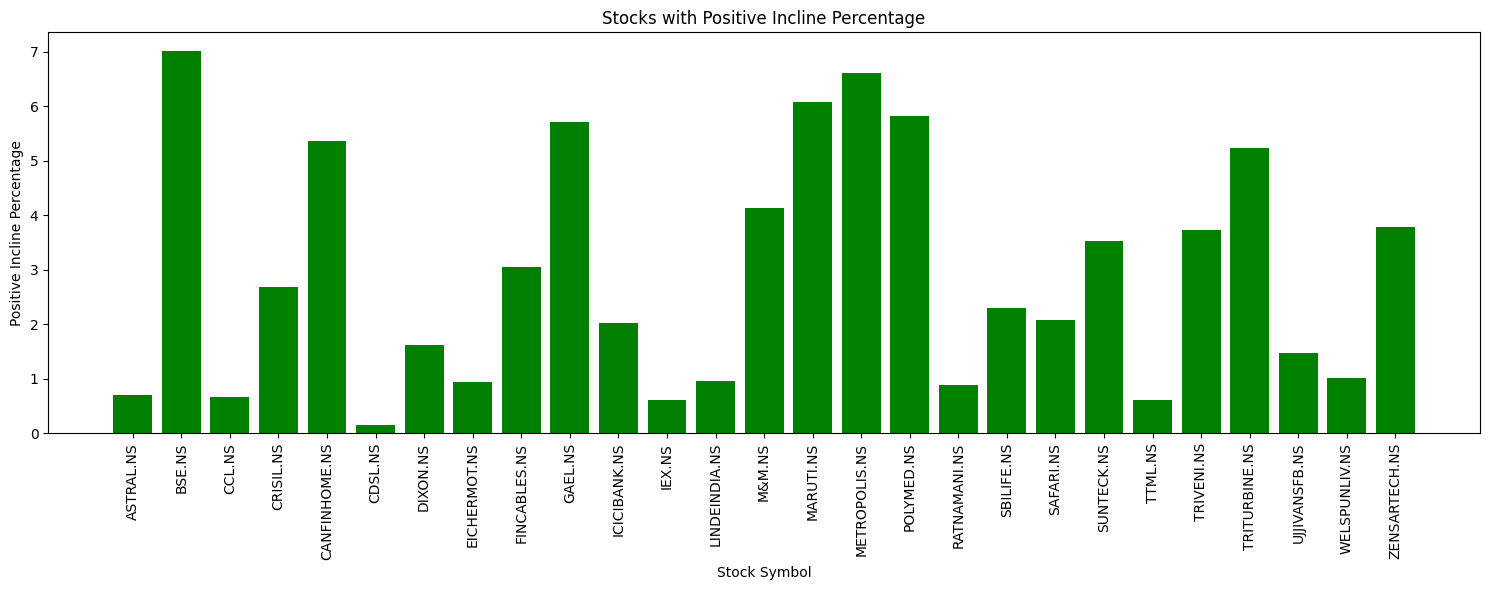

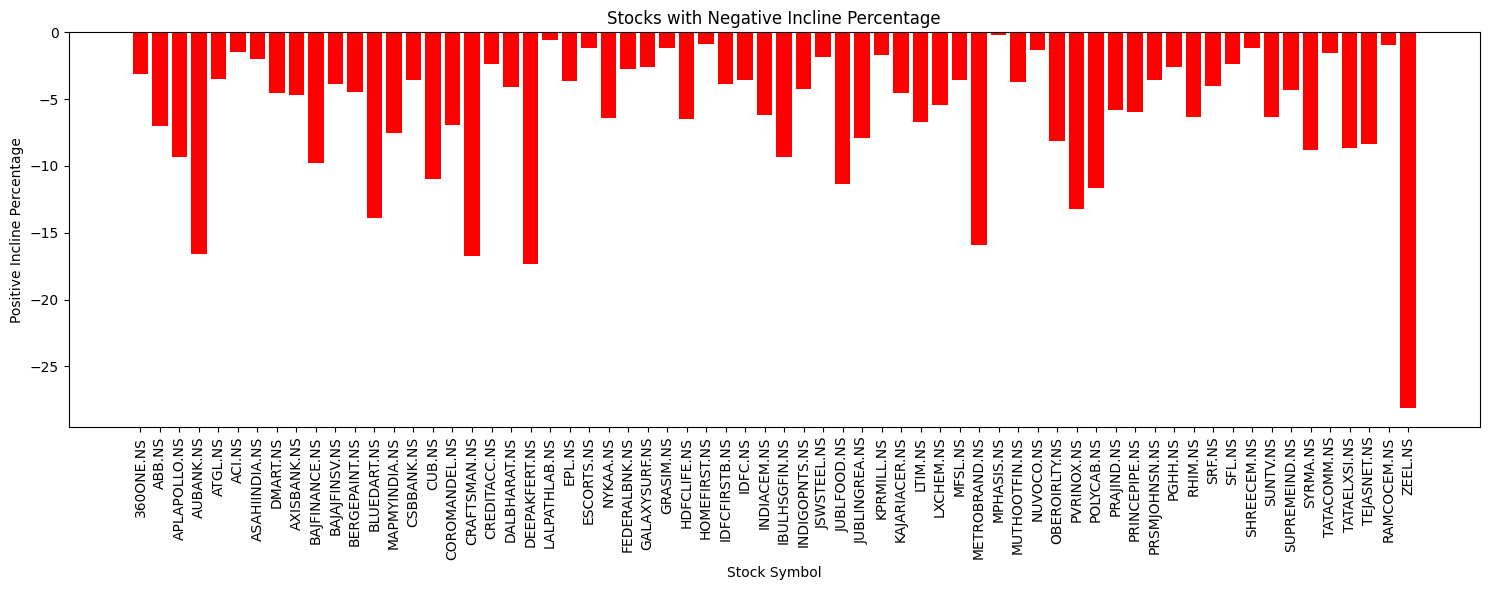

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
results_df = pd.read_csv('smallcap_crossover_results_with_percentages.csv')

# Remove '%' symbol and convert 'Positive Incline Percentage' to numeric
results_df['Positive Incline Percentage'] = pd.to_numeric(results_df['Positive Incline Percentage'].str.rstrip('%'), errors='coerce')

# Filter positive incline percentages
positive_incline_df = results_df[results_df['Positive Incline Percentage'] >= 0]
negative_incline_df = results_df[results_df['Positive Incline Percentage'] < 0]

# Plotting symbols with positive incline percentage in green
plt.figure(figsize=(15, 6))
plt.bar(positive_incline_df['Stock Symbol'], positive_incline_df['Positive Incline Percentage'], color='green')
plt.title('Stocks with Positive Incline Percentage')
plt.xlabel('Stock Symbol')
plt.ylabel('Positive Incline Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting symbols with negative incline percentage in red
plt.figure(figsize=(15, 6))
plt.bar(negative_incline_df['Stock Symbol'], negative_incline_df['Positive Incline Percentage'], color='red')
plt.title('Stocks with Negative Incline Percentage')
plt.xlabel('Stock Symbol')
plt.ylabel('Positive Incline Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


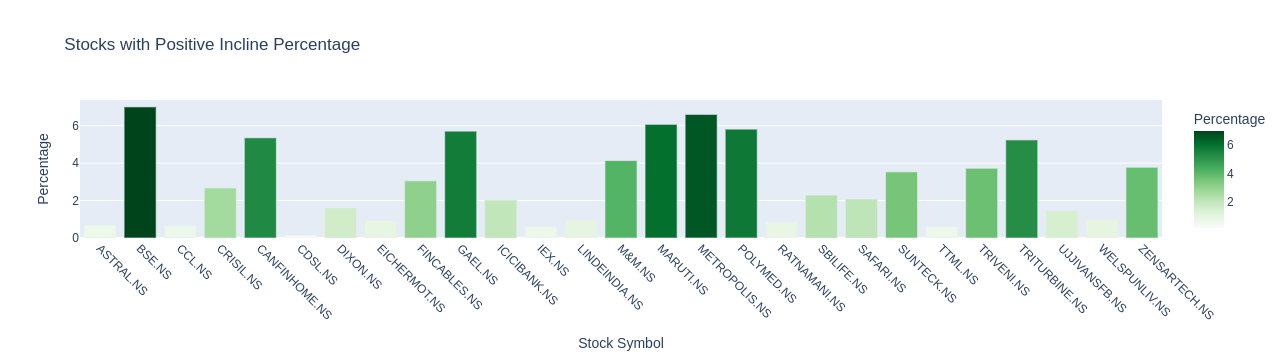

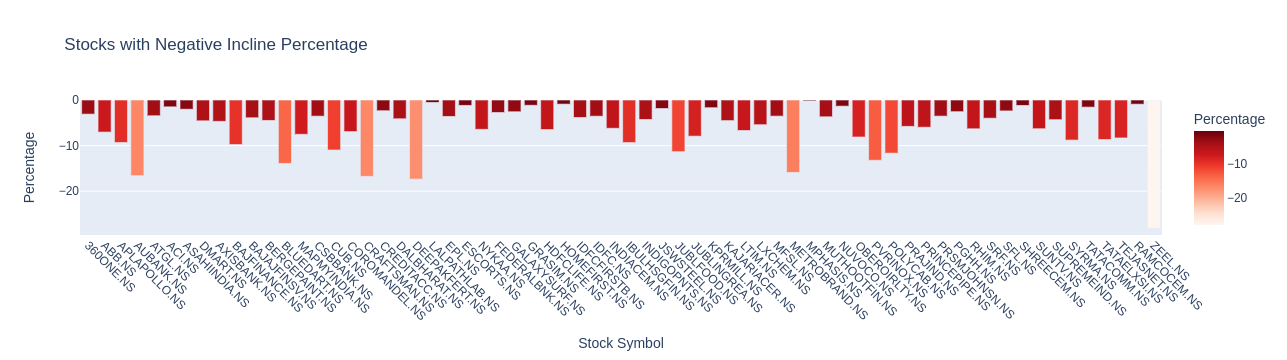

In [53]:
import pandas as pd
import plotly.express as px

# Read the CSV file
results_df = pd.read_csv('smallcap_crossover_results_with_percentages.csv')

# Convert 'Positive Incline Percentage' to numeric
results_df['Positive Incline Percentage'] = pd.to_numeric(results_df['Positive Incline Percentage'].str.rstrip('%'), errors='coerce')

# Filter positive incline percentages
positive_incline_df = results_df[results_df['Positive Incline Percentage'] >= 0]
negative_incline_df = results_df[results_df['Positive Incline Percentage'] < 0]

# Plotting symbols with positive incline percentage in green
fig = px.bar(positive_incline_df, x='Stock Symbol', y='Positive Incline Percentage', color='Positive Incline Percentage',
             title='Stocks with Positive Incline Percentage', labels={'Positive Incline Percentage': 'Percentage'},
             color_continuous_scale='greens')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=positive_incline_df['Stock Symbol'])
fig.show()

# Plotting symbols with negative incline percentage in red
fig = px.bar(negative_incline_df, x='Stock Symbol', y='Positive Incline Percentage', color='Positive Incline Percentage',
             title='Stocks with Negative Incline Percentage', labels={'Positive Incline Percentage': 'Percentage'},
             color_continuous_scale='reds')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=negative_incline_df['Stock Symbol'])
fig.show()


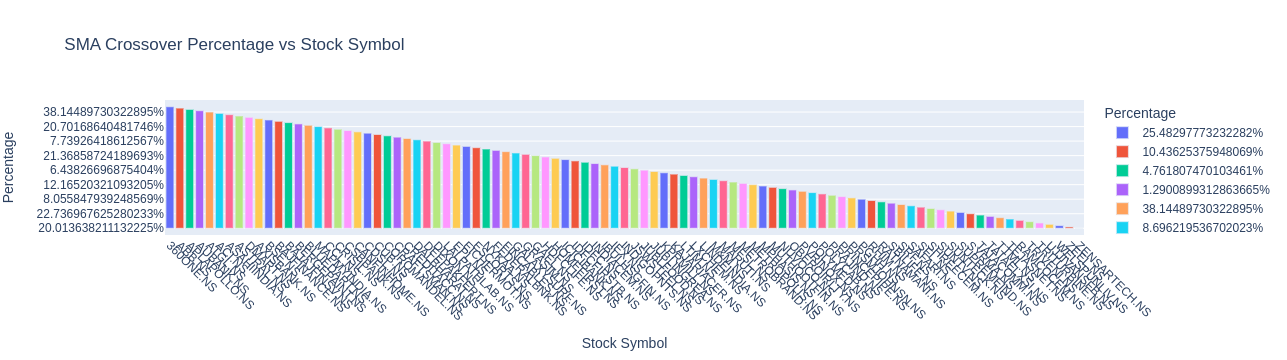

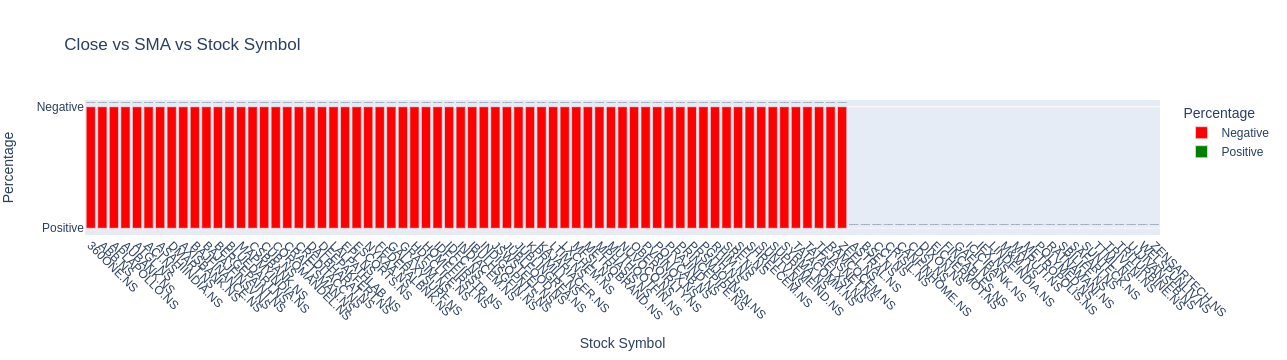

In [46]:
import pandas as pd
import plotly.express as px

# Read the CSV file
results_df = pd.read_csv('crossover_results_with_percentages.csv')

# Plotting SMA Crossover Percentage vs Stock Symbol
fig_sma = px.bar(results_df, x='Stock Symbol', y='SMA Crossover Percentage',
                 color='SMA Crossover Percentage',
                 title='SMA Crossover Percentage vs Stock Symbol',
                 labels={'SMA Crossover Percentage': 'Percentage'},
                 color_continuous_scale='Viridis')
fig_sma.update_xaxes(tickangle=45, tickmode='array', tickvals=results_df['Stock Symbol'])
fig_sma.show()

# Plotting Close vs SMA vs Stock Symbol
fig_close_vs_sma = px.bar(results_df, x='Stock Symbol', y='Close vs SMA',
                          color='Close vs SMA',
                          text='Close vs SMA',
                          title='Close vs SMA vs Stock Symbol',
                          labels={'Close vs SMA': 'Percentage'},
                          color_discrete_map={'Negative': 'red', 'Positive': 'green'})
fig_close_vs_sma.update_xaxes(tickangle=45, tickmode='array', tickvals=results_df['Stock Symbol'])
fig_close_vs_sma.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Display percentage values on bars
fig_close_vs_sma.show()
